# <center>Store-Level and Global Sales Forecasting in Retail: A Model Comparison From Classical to Gradient Boosting Using the Rossmann Dataset</center>

---
## Project Brief

This project investigates two core challenges in retail sales forecasting: accurately predicting daily sales for individual stores and generating reliable company-wide forecasts. Using the Rossmann Store Sales dataset, we compare three advanced forecasting models: SARIMA, CatBoost, and XGBoost. The study demonstrates each model's strengths in handling retail seasonality, promotions, and diverse data features. The outcomes inform both localized store management and global strategic planning for retail operations.

---
## Objectives

- **Objective 1:** Forecast daily sales for a high-performing individual store.
- **Objective 2:** Forecast global average daily sales across the Rossmann network.
---

# 1.0 Library Import and Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2.0 Data Preparation

## 2.1 Load Data

In [2]:
# Load datasets
store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv', dtype={'StateHoliday': str})

## 2.2 Clean Train Data

In [3]:
# EDA(Train)
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
train.shape

(1017209, 9)

In [5]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
# Check if any missing data
missing = train.isnull().sum()
missing.sort_values(ascending=False)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
# Calculate Average Sales Per Customer
train['SalesPerCustomer'] = train['Sales']/train['Customers']
train['SalesPerCustomer'].head()

0     9.482883
1     9.702400
2    10.126675
3     9.342457
4     8.626118
Name: SalesPerCustomer, dtype: float64

In [8]:
# Check if any missing for Average Sales Per Customer
missing = train.isnull().sum()
missing.sort_values(ascending=False)

SalesPerCustomer    172869
Store                    0
DayOfWeek                0
Date                     0
Sales                    0
Customers                0
Open                     0
Promo                    0
StateHoliday             0
SchoolHoliday            0
dtype: int64

In [9]:
# Remove Empty
train.dropna().head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118


## 2.3 Clean Store Data

In [10]:
# EDA(Store)
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
store.shape

(1115, 10)

In [12]:
# Check if any missing data
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [13]:
#  fill empty with the average
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(), inplace = True)

In [14]:
#  fill empty with 0
store.fillna(0, inplace = True)

In [15]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


## 2.4 Merge Datasets

In [16]:
# Inner Join 
Merge = train.merge(right=store, on='Store', how='left')

Merge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


## 2.5 Sampling a subset

In [17]:
# Save merged DataFrame to CSV
Merge.to_csv('merged_data.csv', index=False)

### 2.5.1 Checking device's capabilities

In [18]:
Merge.shape

(1017209, 19)

In [37]:
import psutil

In [41]:
# Get virtual memory details
mem = psutil.virtual_memory()

In [113]:
# Print memory stats in GB
print(f"Total RAM: {mem.total / (1024 ** 3):.2f} GB")
print(f"Available RAM: {mem.available / (1024 ** 3):.2f} GB")
print(f"Used RAM: {mem.used / (1024 ** 3):.2f} GB")
print(f"Memory Usage: {mem.percent}%")

Total RAM: 15.73 GB
,Available RAM: 1.30 GB
,Used RAM: 14.43 GB
,Memory Usage: 91.7%


In [114]:
# Get disk usage of the root directory
disk = psutil.disk_usage('/')

print(f"Total Disk Space: {disk.total / (1024 ** 3):.2f} GB")
print(f"Used Disk Space: {disk.used / (1024 ** 3):.2f} GB")
print(f"Free Disk Space: {disk.free / (1024 ** 3):.2f} GB")
print(f"Disk Usage: {disk.percent}%")

Total Disk Space: 475.66 GB
,Used Disk Space: 254.34 GB
,Free Disk Space: 221.32 GB
,Disk Usage: 53.5%


From the RAM analysis, the current device's available RAM is critically low with only 1.3 GB. The memory usage of 91.7% is too high to safely work with large datasets such as the merge.csv dataset that has 1017209 rows and 19 columns. Loading or training models on the full dataset especially CatBoost or XGBoost will risk crashing the kernel. 

As such, the dataset was sampled.

Note: The system capability analysis was conducted on a team member’s device and is meant to be used as a reference point. As available RAM and performance may still differ across machines, the sampling decision was made to ensure the dataset remains manageable for all environments including execution by instructors who may use machines with varying system specifications.

### 2.5.2 Load and preprocess merged data

In [23]:
# Load and preprocess merged data
df = pd.read_csv('merged_data.csv', dtype={'StateHoliday': str}, low_memory=False)

In [24]:
# Filter rows 
df = df[(df['Open'] == 1) & (df['Sales'] > 0)]

In [25]:
# Convert Date to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Store', 'Date']).reset_index(drop=True)

In [26]:
# Define sample size or fraction
sample_frac = 0.1  # 10% sample for example
sample_size = int(len(df) * sample_frac)

### 2.5.3 Random Sampling

In [27]:
random_sample = df.sample(frac=sample_frac, random_state=42).reset_index(drop=True)

### 2.5.4 Stratified Sampling

In [28]:
# Check to see if 'Store' has enough rows to do stratification
store_counts = df['Store'].value_counts()

# Check how many stores have very few records
print("Stores with fewer than 5 rows:")
print(store_counts[store_counts < 5])
print(f"\nTotal affected stores: {(store_counts < 5).sum()}")

Stores with fewer than 5 rows:
,Series([], Name: count, dtype: int64)
,
,Total affected stores: 0


In [29]:
# Use train_test_split to get stratified sample
_, stratified_sample = train_test_split(
    df,
    test_size=sample_frac,
    stratify=df['Store'],  
    random_state=42
)
stratified_sample = stratified_sample.reset_index(drop=True)

### 2.5.5 Comparison - Random vs Stratified Sampling

In [30]:
# Compare distributions
def plot_distribution(original, sample, column, title_suffix=''):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    original[column].value_counts(normalize=True).sort_index().plot(kind='bar')
    plt.title(f'Original {column} Distribution {title_suffix}')

    plt.subplot(1, 2, 2)
    sample[column].value_counts(normalize=True).sort_index().plot(kind='bar')
    plt.title(f'Sample {column} Distribution {title_suffix}')

    plt.tight_layout()
    plt.show()

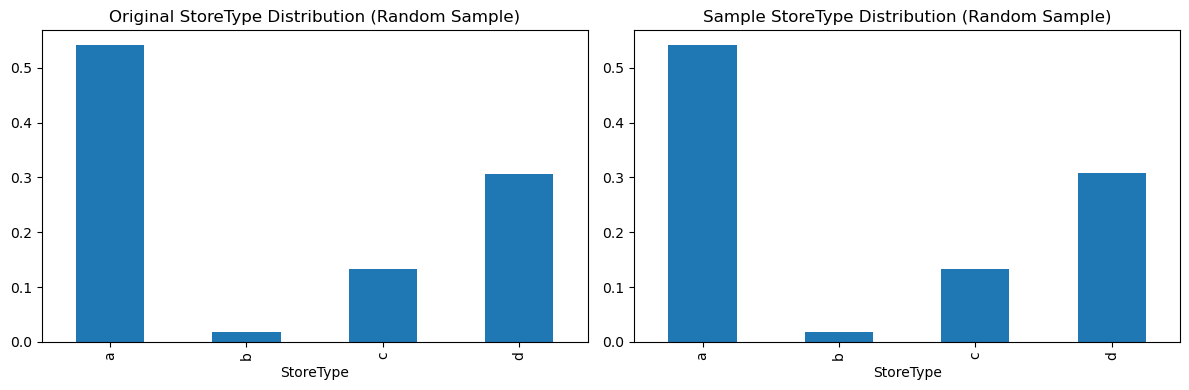

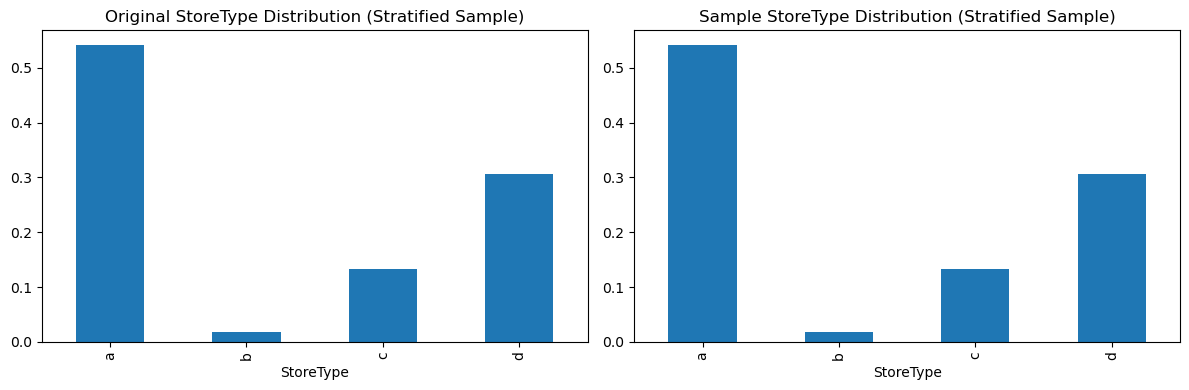

In [31]:
# Compare StoreType distribution
plot_distribution(df, random_sample, 'StoreType', '(Random Sample)')
plot_distribution(df, stratified_sample, 'StoreType', '(Stratified Sample)')

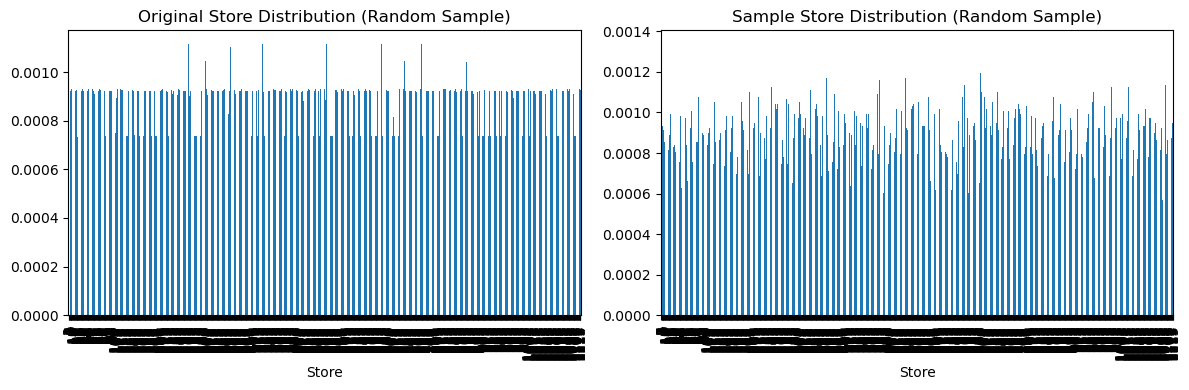

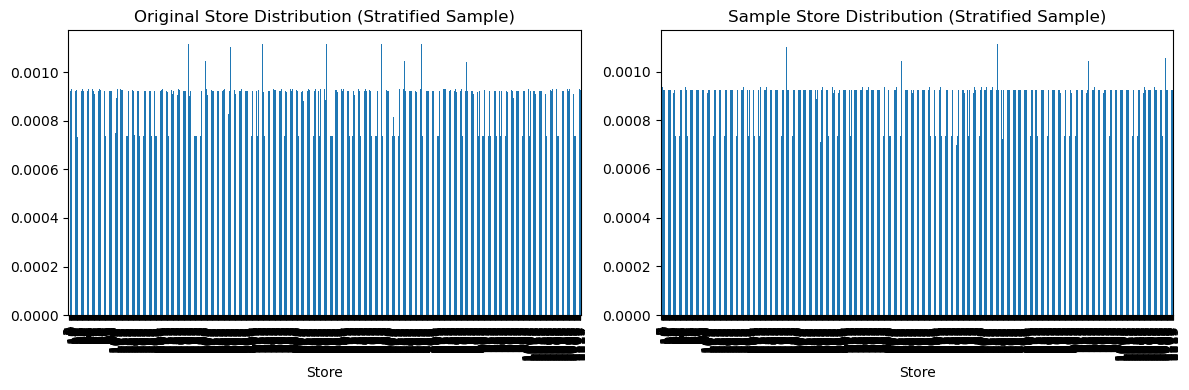

In [32]:
# Compare Store distribution
plot_distribution(df, random_sample, 'Store', '(Random Sample)')
plot_distribution(df, stratified_sample, 'Store', '(Stratified Sample)')

In [33]:
# Check structure of the two samples
overlap = pd.merge(random_sample, stratified_sample, how='inner')
print(f"Overlap rows between samples: {len(overlap)}")
print(random_sample['Store'].value_counts(normalize=True))
print(stratified_sample['Store'].value_counts(normalize=True))
print(f"Random sample shape: {random_sample.shape}")
print(f"Stratified sample shape: {stratified_sample.shape}")

Overlap rows between samples: 8510
,Store
,209     0.001338
,1097    0.001315
,262     0.001303
,562     0.001291
,863     0.001208
,          ...   
,697     0.000533
,540     0.000521
,575     0.000509
,159     0.000497
,771     0.000497
,Name: proportion, Length: 1115, dtype: float64
,Store
,494    0.001113
,423    0.001113
,682    0.001113
,85     0.001113
,733    0.001113
,         ...   
,183    0.000722
,492    0.000722
,909    0.000722
,348    0.000711
,644    0.000699
,Name: proportion, Length: 1115, dtype: float64
,Random sample shape: (84434, 19)
,Stratified sample shape: (84434, 19)


From the comparison analysis, there is an 8510 (10%) overlapping of rows between the samples. This means that although both samples come from the same dataset, they resulted in distinct subsets of store-day combos. 

When comparing 'StoreType', the distribution of both the random and stratified sampling are similar to the original. 

However, when comparing 'Store', the distribution for the stratified sampling is more similar to the original compared to random sampling.

Since the main objective is store-level forecasting, the stratified sampling was chosen as it most resembles the original dataset.

### 2.5.6 Final checking of the dataset 

In [34]:
selected_sample = stratified_sample 

# Check for missing values
print(selected_sample.isnull().sum())

# Check column datatypes
print(selected_sample.dtypes)

# Check duplicates
print(selected_sample.duplicated().sum())

# Check min/max values
print(selected_sample.describe(include='all'))

# Check value counts of key categorical columns
print(selected_sample['StoreType'].value_counts())
print(selected_sample['Assortment'].value_counts())
print(selected_sample['Promo'].value_counts())
print(selected_sample['StateHoliday'].value_counts())

# Check number of unique stores and dates
print(f"Number of unique stores: {selected_sample['Store'].nunique()}")
print(f"Date range: {selected_sample['Date'].min()} to {selected_sample['Date'].max()}")

print(selected_sample.head())

Store                        0
,DayOfWeek                    0
,Date                         0
,Sales                        0
,Customers                    0
,Open                         0
,Promo                        0
,StateHoliday                 0
,SchoolHoliday                0
,SalesPerCustomer             0
,StoreType                    0
,Assortment                   0
,CompetitionDistance          0
,CompetitionOpenSinceMonth    0
,CompetitionOpenSinceYear     0
,Promo2                       0
,Promo2SinceWeek              0
,Promo2SinceYear              0
,PromoInterval                0
,dtype: int64
,Store                                 int64
,DayOfWeek                             int64
,Date                         datetime64[ns]
,Sales                                 int64
,Customers                             int64
,Open                                  int64
,Promo                                 int64
,StateHoliday                         object
,SchoolHoliday     

In [35]:
# Save selected sample for modeling
selected_sample.to_csv('sample_for_modeling.csv', index=False)

# 2.6 Data Preprocessing

In [13]:
import pandas as pd
import numpy as np

# Load sample_for_modeling.csv dataset
df = pd.read_csv('sample_for_modeling.csv', parse_dates=['Date'])

In [14]:
print("Before filling missing dates")
print(f"Number of rows: {len(df)}")
print(f"Number of unique stores: {df['Store'].nunique()}")
print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
print("Sample rows:")
print(df.sort_values(['Store', 'Date']).head(5))

Before filling missing dates
Number of rows: 84434
Number of unique stores: 1115
Date range: 2013-01-01 to 2015-07-31
Sample rows:
       Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
9372       1          1 2013-01-07   7176        785     1      1   
51354      1          4 2013-01-10   4892        615     1      1   
40050      1          6 2013-01-12   4952        646     1      0   
1312       1          2 2013-01-15   3900        512     1      0   
13015      1          1 2013-01-28   4055        549     1      0   

      StateHoliday  SchoolHoliday  SalesPerCustomer StoreType Assortment  \
9372             0              1          9.141401         c          a   
51354            0              1          7.954472         c          a   
40050            0              0          7.665635         c          a   
1312             0              0          7.617188         c          a   
13015            0              0          7.386157         c          a  

From the above, it can be seen that there are date gaps present. Only a subset of all potential dates per stores exists.
This is a problem for some models as it assumes a complete time series and every single date should be in order.

In [15]:
# Generate full date range
full_date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())
store_ids = df['Store'].unique()

In [16]:
# Create all combinations of Store × Date
full_index = pd.MultiIndex.from_product([store_ids, full_date_range], names=['Store', 'Date'])
full_df = pd.DataFrame(index=full_index).reset_index()

In [17]:
# Merge with original dataset
df_full = pd.merge(full_df, df, on=['Store', 'Date'], how='left')

In [18]:
# Fill missing values for numerical columns
df_full['Open'] = df_full['Open'].fillna(0)
df_full['Sales'] = df_full['Sales'].fillna(0)
df_full['Customers'] = df_full['Customers'].fillna(0)
df_full['SalesPerCustomer'] = df_full['SalesPerCustomer'].fillna(0)

In [19]:
# sort for inspection
df_full = df_full.sort_values(['Store', 'Date']).reset_index(drop=True)

In [20]:
print("After filling missing dates")
print(f"Number of rows: {len(df_full)}")
print(f"Expected rows: {len(store_ids) * len(full_date_range)}")
print("Sample rows:")
print(df_full.head(5))

After filling missing dates
Number of rows: 1050330
Expected rows: 1050330
Sample rows:
   Store       Date  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1 2013-01-01        NaN    0.0        0.0   0.0    NaN          NaN   
1      1 2013-01-02        NaN    0.0        0.0   0.0    NaN          NaN   
2      1 2013-01-03        NaN    0.0        0.0   0.0    NaN          NaN   
3      1 2013-01-04        NaN    0.0        0.0   0.0    NaN          NaN   
4      1 2013-01-05        NaN    0.0        0.0   0.0    NaN          NaN   

   SchoolHoliday  SalesPerCustomer StoreType Assortment  CompetitionDistance  \
0            NaN               0.0       NaN        NaN                  NaN   
1            NaN               0.0       NaN        NaN                  NaN   
2            NaN               0.0       NaN        NaN                  NaN   
3            NaN               0.0       NaN        NaN                  NaN   
4            NaN               0.0       Na

The missing days are assumed to be closed and thus filled with zeros.

Now, the rows are 1,050,330 which is 1,115 stores × 943 days, from Jan 1, 2013 to Jul 31, 2015.

All new rows for previously missing dates have NaN in non-essential columns like 'Promo', 'StoreType'.

Defaults used for 'Sales', 'Customers', 'Open', and 'SalesPerCustomer' are set to 0.0

Conversely, 'DayOfWeek' is recalculated based on the actual date.

In [21]:
# Extract store-level static info from original dataset
store_info = df.groupby('Store').first().reset_index()

# Merge it back into the filled dataset
df_full = df_full.drop(columns=['StoreType', 'Assortment', 'CompetitionDistance',
                                'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
                                'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'])

df_full = pd.merge(df_full, store_info[['Store', 'StoreType', 'Assortment',
                                         'CompetitionDistance', 'CompetitionOpenSinceMonth',
                                         'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
                                         'Promo2SinceYear', 'PromoInterval']],
                   on='Store', how='left')

In [22]:
df_full[['Promo', 'SchoolHoliday', 'StateHoliday']] = df_full.groupby('Store')[['Promo', 'SchoolHoliday', 'StateHoliday']].ffill()

The static store information was extracted. Fields like 'StoreType', 'Assortment' and 'CompetitionDistance' do not change over time.
This static info is merged back into the filled dataset. 

Next the incomplete columns from the filled dataset are removed and replaced with the correct store-level attributes using a left join.

Columns like 'Promo', 'SchoolHoliday', and 'StateHoliday' are forward-filled within each store to handle missing values in the newly added rows.

This will make sure that every row has consistent and complete data.

In [23]:
print("After filling missing dates")
print(f"Number of rows: {len(df_full)}")
print(f"Expected rows: {len(store_ids) * len(full_date_range)}")
print("Sample rows:")
print(df_full.head(5))

After filling missing dates
Number of rows: 1050330
Expected rows: 1050330
Sample rows:
   Store       Date  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1 2013-01-01        NaN    0.0        0.0   0.0    NaN          NaN   
1      1 2013-01-02        NaN    0.0        0.0   0.0    NaN          NaN   
2      1 2013-01-03        NaN    0.0        0.0   0.0    NaN          NaN   
3      1 2013-01-04        NaN    0.0        0.0   0.0    NaN          NaN   
4      1 2013-01-05        NaN    0.0        0.0   0.0    NaN          NaN   

   SchoolHoliday  SalesPerCustomer StoreType Assortment  CompetitionDistance  \
0            NaN               0.0         c          a               1270.0   
1            NaN               0.0         c          a               1270.0   
2            NaN               0.0         c          a               1270.0   
3            NaN               0.0         c          a               1270.0   
4            NaN               0.0         

Currently, each store has continuous daily data. 
Closed days have Sales = 0, Open = 0.
Static store attributes have been restored.
Promo and holiday indicators are forward-filled.

In [24]:
#  Fill missing numerical values (Sales, Open, Customers, CompetitionDistance)
for col in ['Sales', 'Open', 'Customers', 'CompetitionDistance']:
    df_full[col] = df_full[col].fillna(0)

In [25]:
# StateHoliday has strings like 'a', 'b', 'c' so map them to integers first
df_full['StateHoliday'] = df_full['StateHoliday'].fillna('0')
df_full['StateHoliday'] = df_full['StateHoliday'].replace({'0':0, 'a':1, 'b':2, 'c':3}).astype(int)

In [26]:
# For Promo and SchoolHoliday, fill missing with 0 and convert to int directly
df_full['Promo'] = df_full['Promo'].fillna(0).astype(int)
df_full['SchoolHoliday'] = df_full['SchoolHoliday'].fillna(0).astype(int)

In [27]:
# Encode categorical static store info
df_full['StoreType'] = df_full['StoreType'].astype('category').cat.codes
df_full['Assortment'] = df_full['Assortment'].astype('category').cat.codes

In [28]:
# Sort data (important)
df_full = df_full.sort_values(['Store', 'Date']).reset_index(drop=True)

Missing values for 'Sales', 'Open', 'Customers', and 'CompetitionDistance' were filled with 0.

The categorical column 'StateHoliday' that had labels ('a', 'b', 'c') were mapped to integers (0-3).

Missing values in 'Promo' and 'SchoolHoliday' were replaced with 0 and changed to integers.

For feature engineering, date-related features were extracted from the 'Date' column:

- 'DayOfWeek' (1 = Monday, …, 7 = Sunday)

- 'Month', 'Year', and 'WeekOfYear' (ISO week number)

- 'IsWeekend' binary flag indicating weekends (Saturday/Sunday).

Also, 'StoreType' and 'Assortment' were converted to categorical codes to represent their categories as integers for modeling.

In [29]:
# Summary info
print("Dataset info:")
print(df_full.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050330 entries, 0 to 1050329
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1050330 non-null  int64         
 1   Date                       1050330 non-null  datetime64[ns]
 2   DayOfWeek                  84434 non-null    float64       
 3   Sales                      1050330 non-null  float64       
 4   Customers                  1050330 non-null  float64       
 5   Open                       1050330 non-null  float64       
 6   Promo                      1050330 non-null  int32         
 7   StateHoliday               1050330 non-null  int32         
 8   SchoolHoliday              1050330 non-null  int32         
 9   SalesPerCustomer           1050330 non-null  float64       
 10  StoreType                  1050330 non-null  int8          
 11  Assortment             

In [30]:
print("\nCheck for missing values:")
print(df_full.isna().sum())


Check for missing values:
Store                             0
Date                              0
DayOfWeek                    965896
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
SalesPerCustomer                  0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
dtype: int64


In [31]:
print("\nSample rows after preprocessing:")
print(df_full.head(10))


Sample rows after preprocessing:
   Store       Date  DayOfWeek   Sales  Customers  Open  Promo  StateHoliday  \
0      1 2013-01-01        NaN     0.0        0.0   0.0      0             0   
1      1 2013-01-02        NaN     0.0        0.0   0.0      0             0   
2      1 2013-01-03        NaN     0.0        0.0   0.0      0             0   
3      1 2013-01-04        NaN     0.0        0.0   0.0      0             0   
4      1 2013-01-05        NaN     0.0        0.0   0.0      0             0   
5      1 2013-01-06        NaN     0.0        0.0   0.0      0             0   
6      1 2013-01-07        1.0  7176.0      785.0   1.0      1             0   
7      1 2013-01-08        NaN     0.0        0.0   0.0      1             0   
8      1 2013-01-09        NaN     0.0        0.0   0.0      1             0   
9      1 2013-01-10        4.0  4892.0      615.0   1.0      1             0   

   SchoolHoliday  SalesPerCustomer  StoreType  Assortment  \
0              0        

In [32]:
# Check unique values of key categorical columns
print("\nUnique values in categorical columns:")
print(f"StateHoliday: {df_full['StateHoliday'].unique()}")
print(f"Promo: {df_full['Promo'].unique()}")
print(f"SchoolHoliday: {df_full['SchoolHoliday'].unique()}")
print(f"StoreType: {df_full['StoreType'].unique()}")
print(f"Assortment: {df_full['Assortment'].unique()}")


Unique values in categorical columns:
StateHoliday: [0 1 2 3]
Promo: [0 1]
SchoolHoliday: [0 1]
StoreType: [2 0 3 1]
Assortment: [0 2 1]


In [33]:
# Check date range and number of stores
print("\nDate range:", df_full['Date'].min(), "to", df_full['Date'].max())
print("Number of stores:", df_full['Store'].nunique())


Date range: 2013-01-01 00:00:00 to 2015-07-31 00:00:00
Number of stores: 1115


In [34]:
# Quick check for any negative sales (shouldn't be any)
print("Negative sales count:", (df_full['Sales'] < 0).sum())

Negative sales count: 0


After running data integrity checks, it was confirmed there are no missing values remaining in any columns. Also, verified that StateHoliday, Promo, and SchoolHoliday contain expected unique integer values. The dataset also confirmed to cover dates from 2013-01-01 to 2015-07-31. The dataset has 1,115 unique stores and there are no negative sales values in the dataset.

In [35]:
df_full.to_csv('data_preprocessing.csv', index=False)

# 3.0 Exploratory Data Analysis

In [36]:
import pandas as pd

# Load dataset
df = pd.read_csv('data_preprocessing.csv')

# Show basic structure
print("Dataset Shape:", df.shape)
print("\nColumn Names and Types:")
print(df.dtypes)

# Show first 5 rows
print("\nSample Records:")
print(df.head())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Check for unique values in each column (helps identify categorical features)
print("\nUnique Values per Column:")
print(df.nunique())

Dataset Shape: (1050330, 19)

Column Names and Types:
Store                          int64
Date                          object
DayOfWeek                    float64
Sales                        float64
Customers                    float64
Open                         float64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
SalesPerCustomer             float64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

Sample Records:
   Store        Date  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0      1  2013-01-01        NaN    0.0        0.0   0.0      0             0   
1      1  2013-01-02        NaN    0.0        0.0   

## 3.1 Dataset Overview

- 1,050,330 rows × 19 columns
- Data spans across 942 dates for 1115 stores
- Target variable: Sales

## 3.2 Temporal Coverage

Visualize the sales trend over time to inspect seasonality and temporal behavior

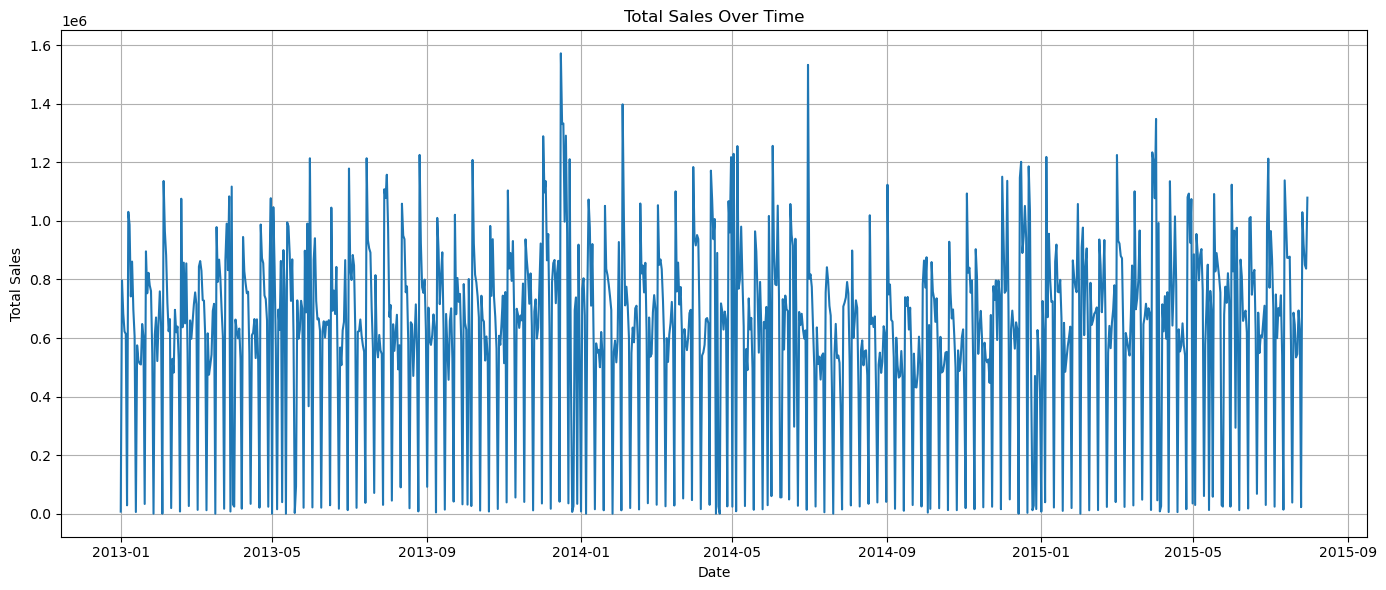

In [37]:
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate sales by date
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'])
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
print("Unique values in 'Open':", df['Open'].unique())
print("Value counts:")
print(df['Open'].value_counts())

Unique values in 'Open': [0. 1.]
Value counts:
Open
0.0    965896
1.0     84434
Name: count, dtype: int64


In [39]:
# Filter out closed days
df = df[df['Open'] == 1].copy()

## 3.2 Sales Distribution and Outliers

Analyze overall sales distribution

C:\Users\amarl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


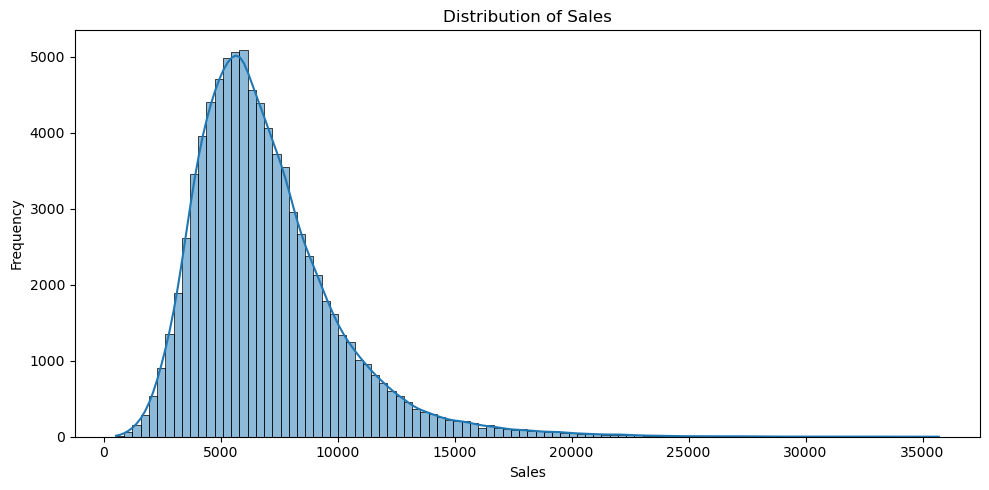

In [40]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=100, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [41]:
zero_sales = df[df['Sales'] == 0]
print(f"Zero-sales records: {len(zero_sales)} ({len(zero_sales) / len(df) * 100:.2f}%)")

Zero-sales records: 0 (0.00%)


## 3.3 Categorical Breakdown (Promo, Holidays, Weekends)

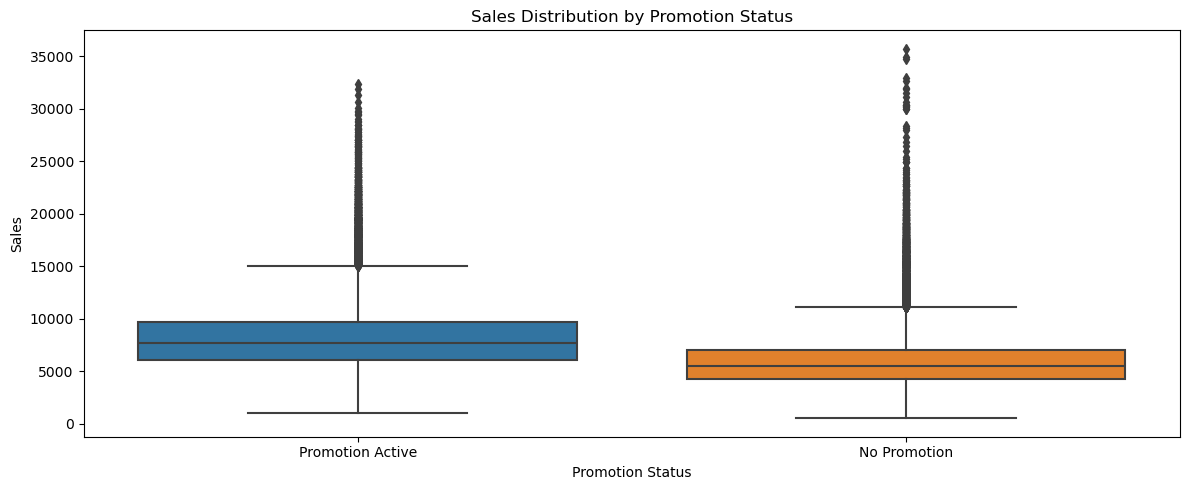

In [42]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Promo'].map({0: 'No Promotion', 1: 'Promotion Active'}), y=df['Sales'])
plt.title('Sales Distribution by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

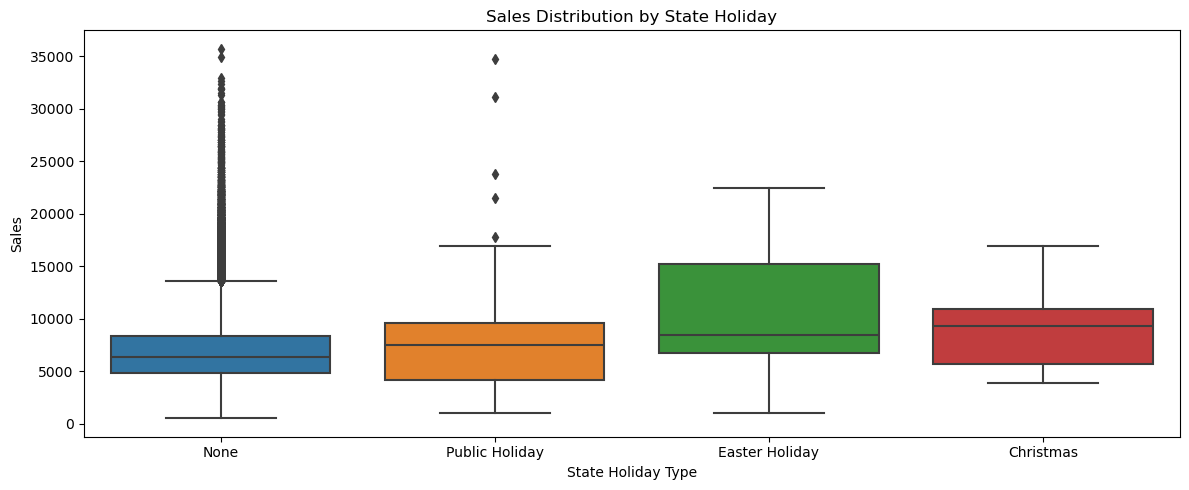

In [43]:
# Map StateHoliday values directly for plotting
holiday_map = {
    0: 'None',
    1: 'Public Holiday',
    2: 'Easter Holiday',
    3: 'Christmas'
}

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['StateHoliday'].map(holiday_map), y=df['Sales'])
plt.title('Sales Distribution by State Holiday')
plt.xlabel('State Holiday Type')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

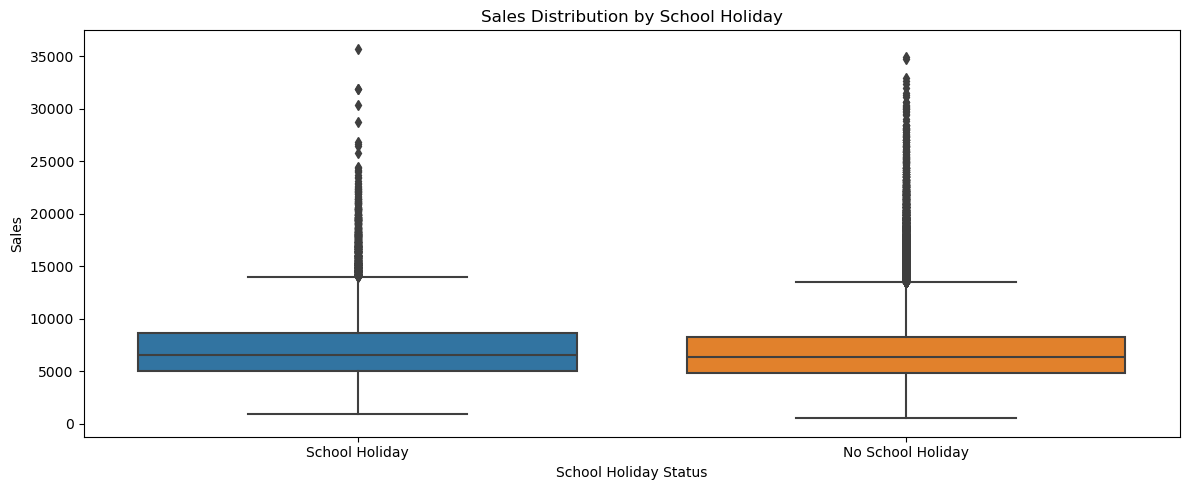

In [44]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['SchoolHoliday'].map({0: 'No School Holiday', 1: 'School Holiday'}), y=df['Sales'])
plt.title('Sales Distribution by School Holiday')
plt.xlabel('School Holiday Status')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

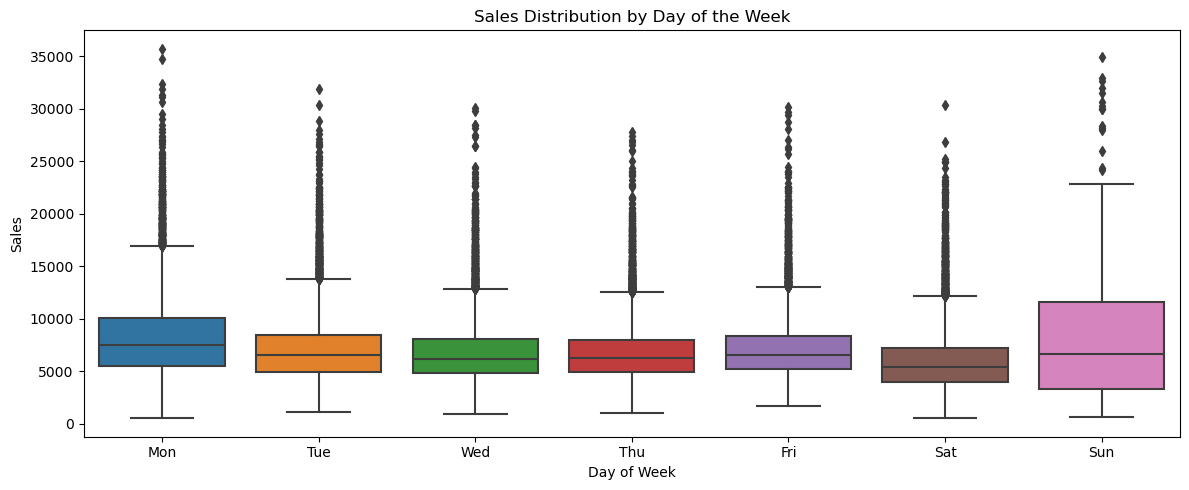

In [45]:
# Define labels and desired order
dow_labels = {
    1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu',
    5: 'Fri', 6: 'Sat', 7: 'Sun'
}
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(12, 5))
sns.boxplot(
    x=df['DayOfWeek'].map(dow_labels),
    y=df['Sales'],
    order=day_order  # enforce correct order
)
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

## 3.4 Store-Level Variation

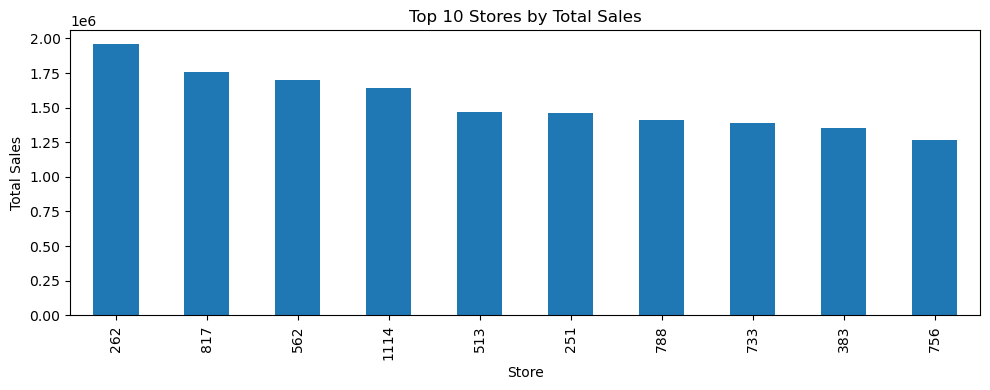

In [46]:
top_stores = df.groupby('Store')['Sales'].sum().sort_values(ascending=False).head(10)
top_stores.plot(kind='bar', figsize=(10, 4), title='Top 10 Stores by Total Sales')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

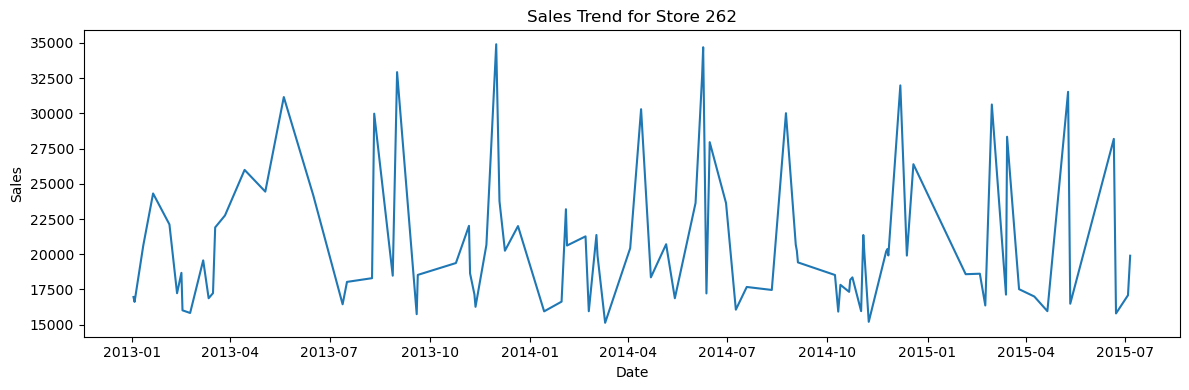

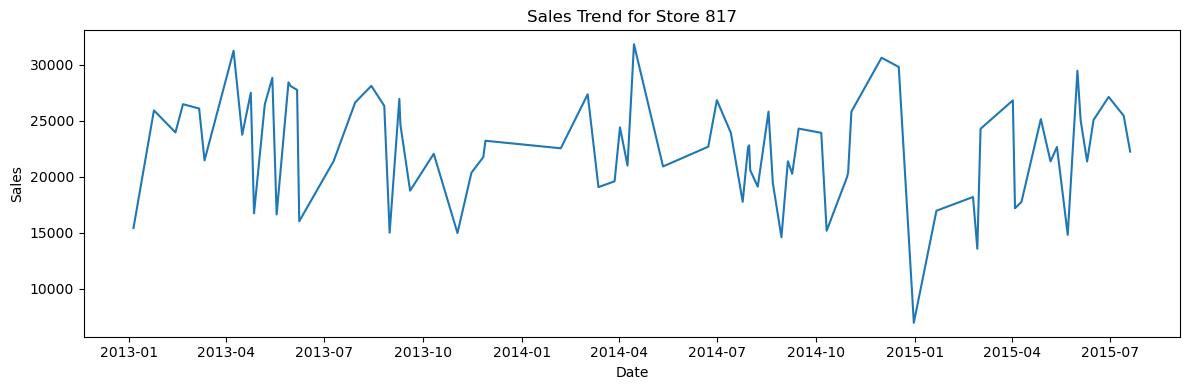

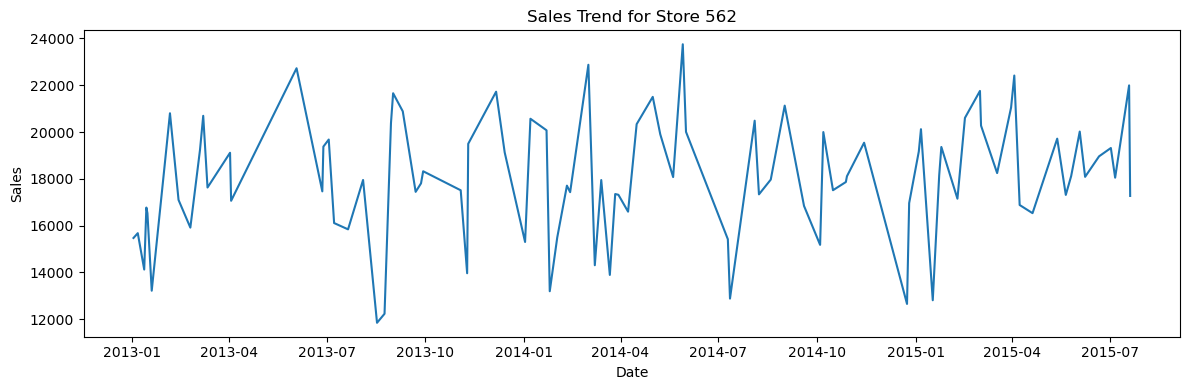

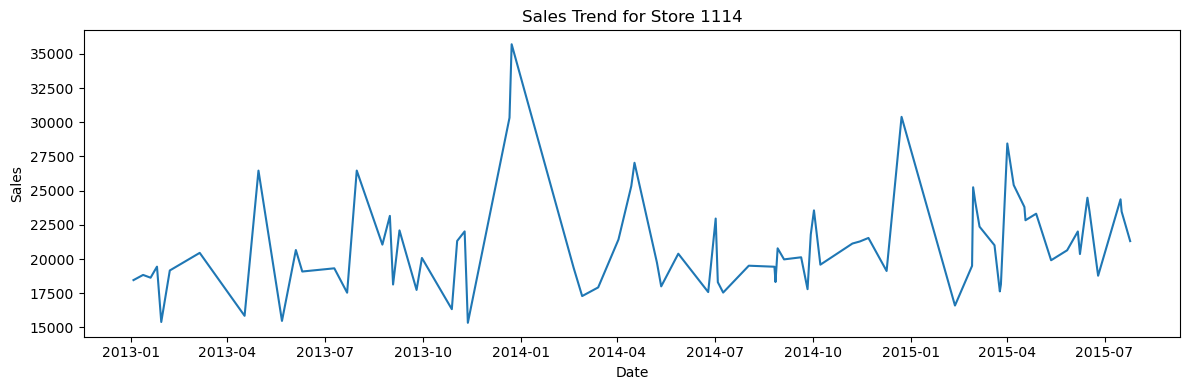

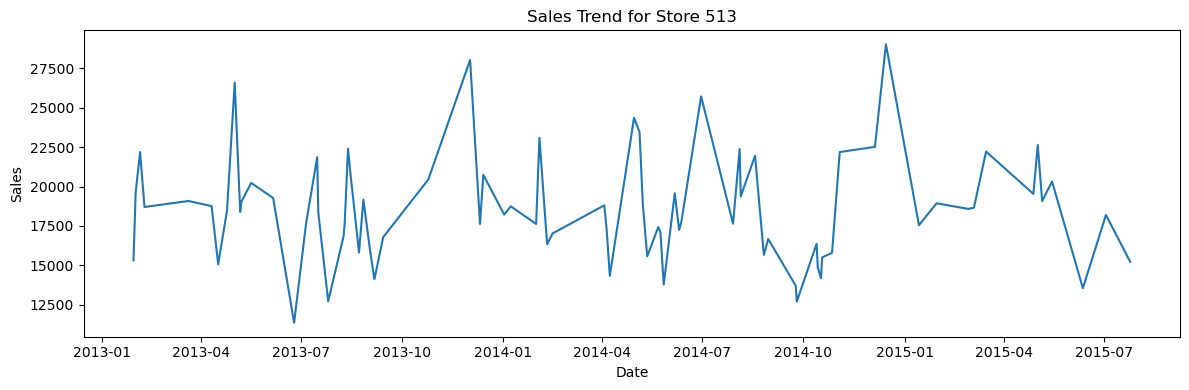

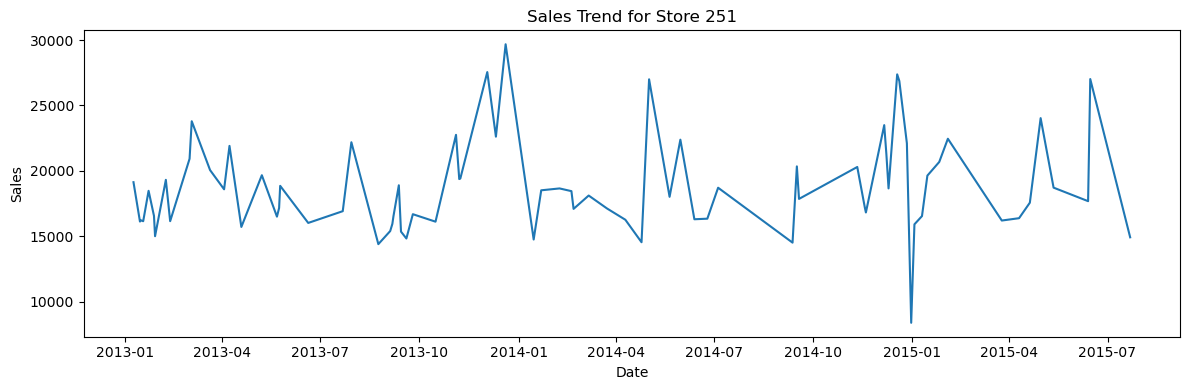

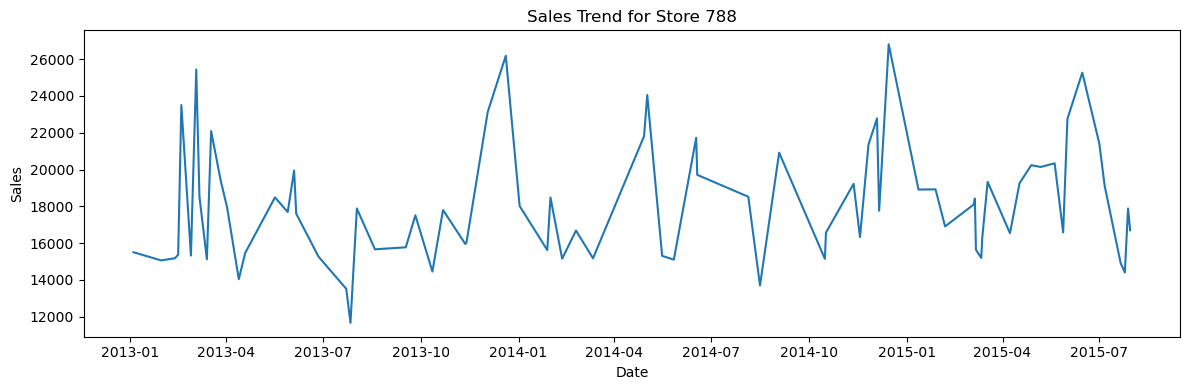

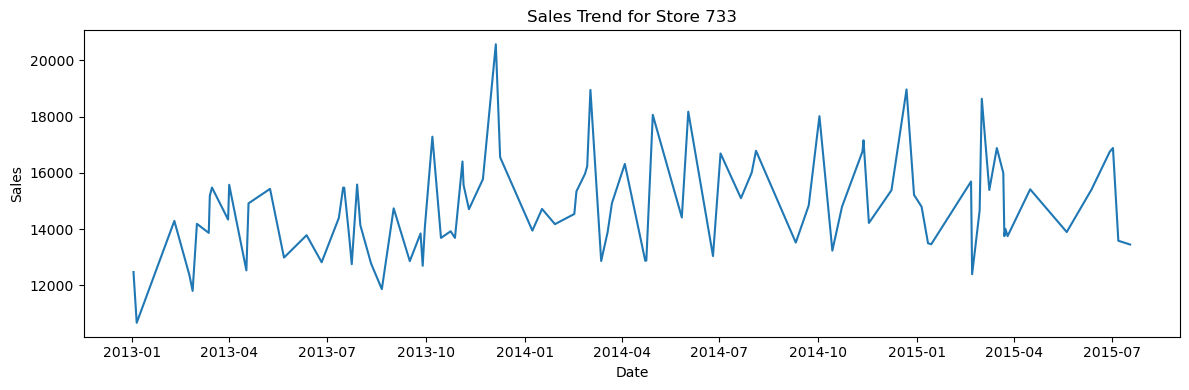

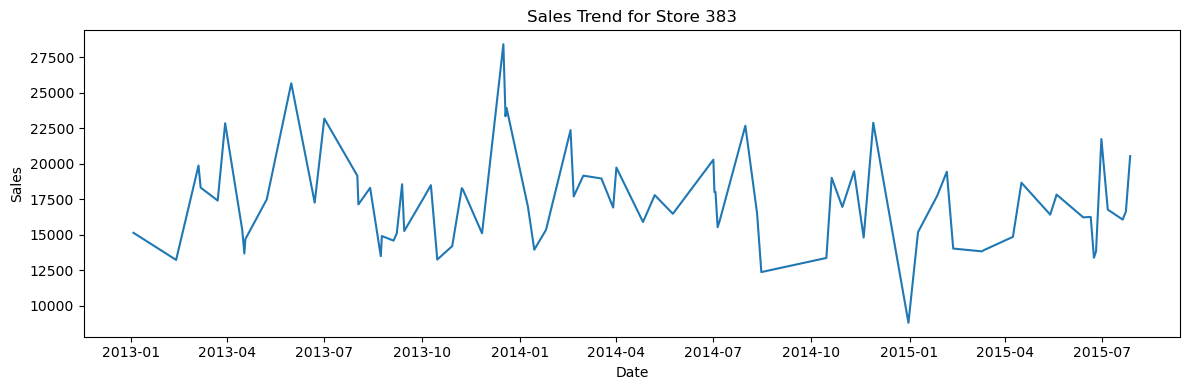

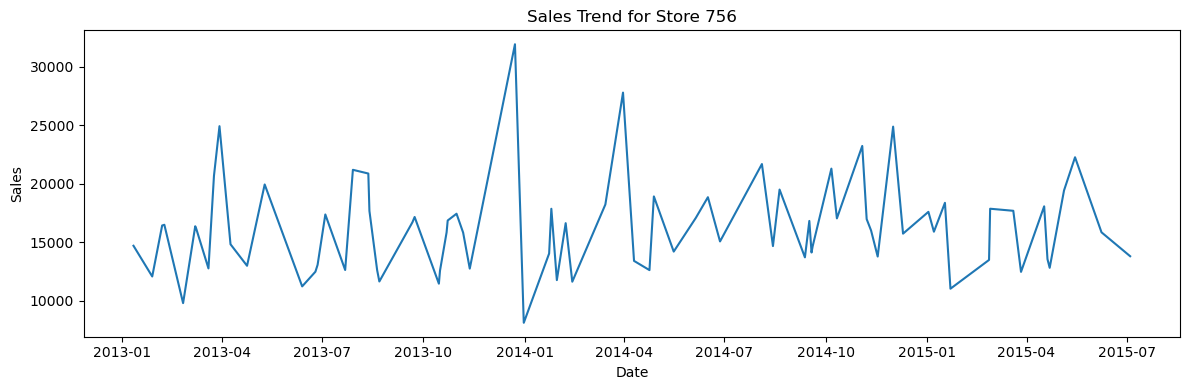

In [47]:
top_stores = df.groupby('Store')['Sales'].sum().sort_values(ascending=False).head(10).index

for store_id in top_stores:
    store_data = df[df['Store'] == store_id]
    plt.figure(figsize=(12, 4))
    plt.plot(store_data['Date'], store_data['Sales'])
    plt.title(f'Sales Trend for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.show()

## 3.5 Correlation Heatmap

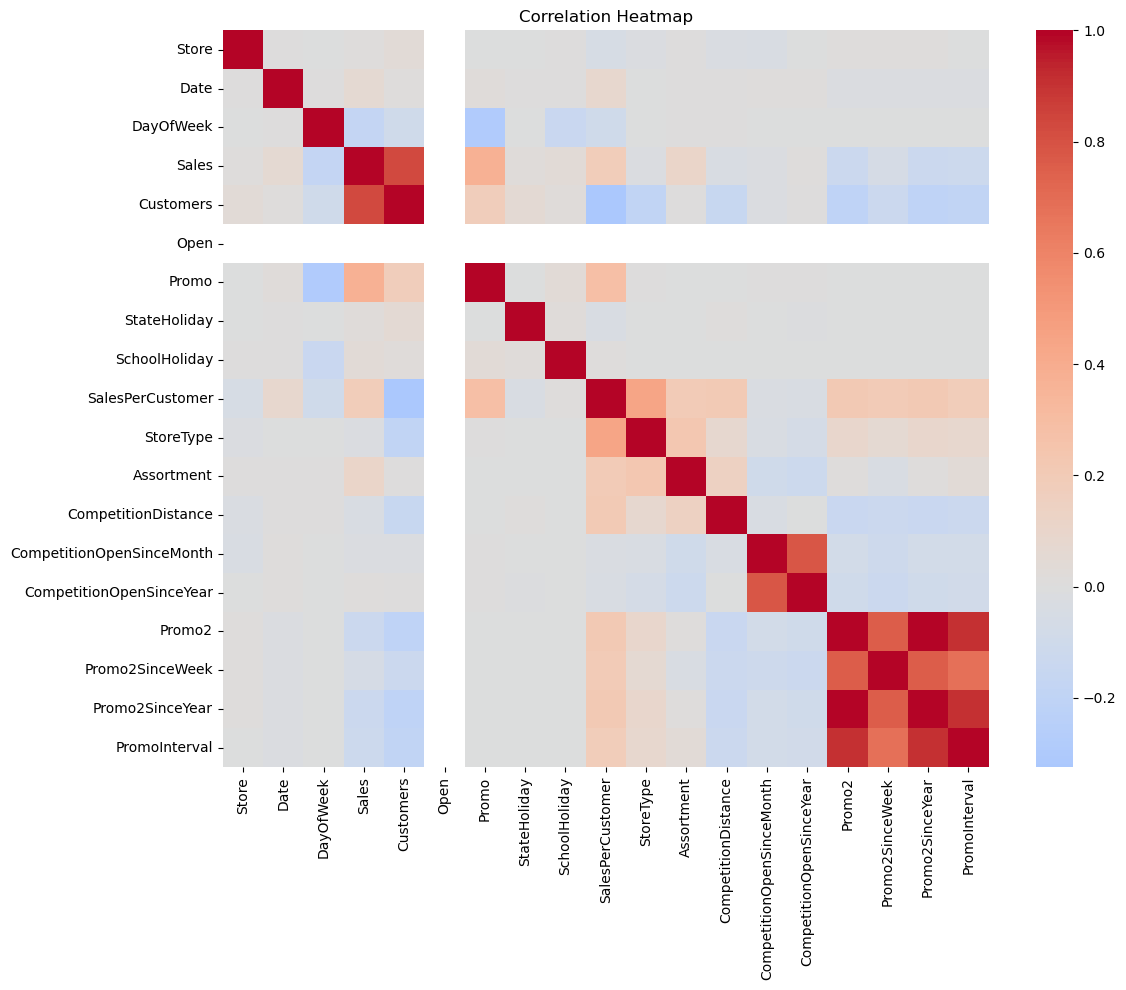

In [48]:
import numpy as np

# Encode categorical columns first
df_corr = df.copy()
df_corr['PromoInterval'] = df_corr['PromoInterval'].astype('category').cat.codes
df_corr['Date'] = pd.to_numeric(df_corr['Date'])

# Compute correlation matrix
corr = df_corr.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## 3.6 Sales by Store Type

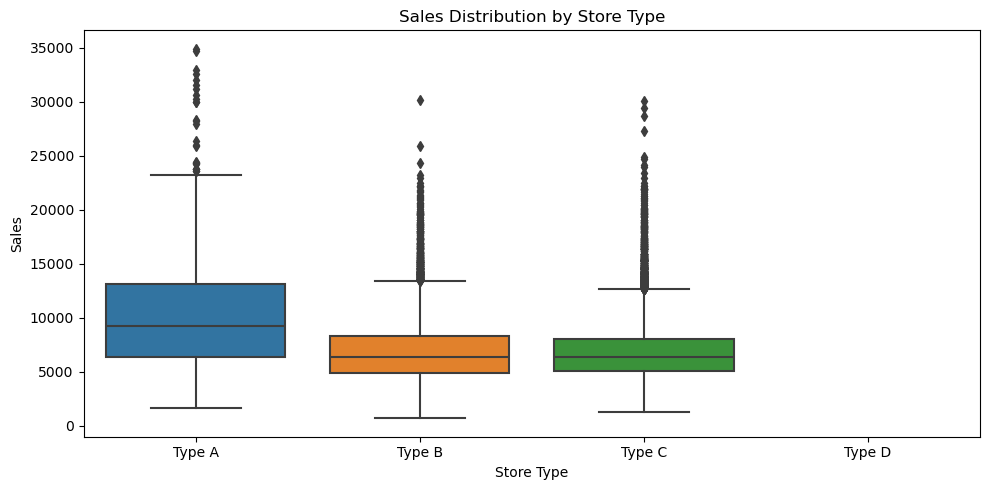

In [49]:
store_type_map = {
    1: 'Type A',
    2: 'Type B',
    3: 'Type C',
    4: 'Type D'
}

store_order = ['Type A', 'Type B', 'Type C', 'Type D']

plt.figure(figsize=(10, 5))
sns.boxplot(
    x=df['StoreType'].map(store_type_map),
    y=df['Sales'],
    order=store_order
)
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

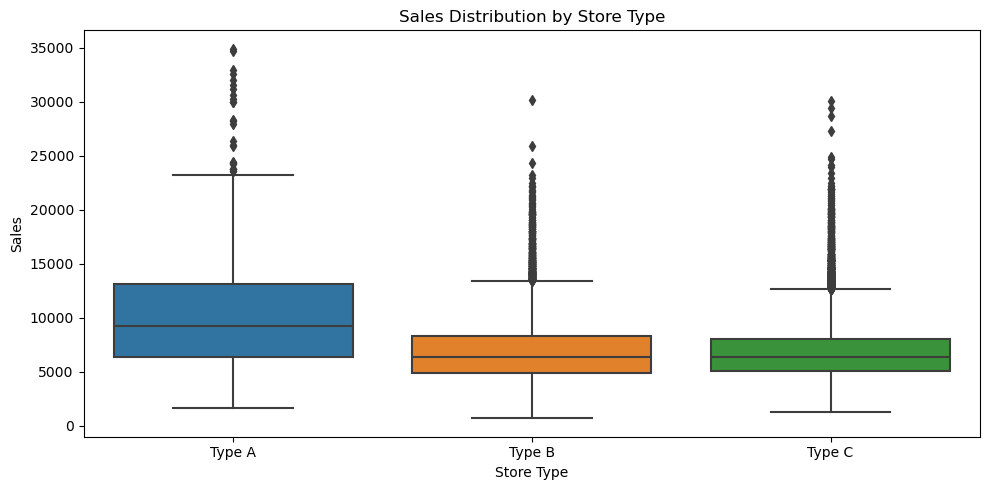

In [50]:
store_type_map = {
    1: 'Type A',
    2: 'Type B',
    3: 'Type C'
}

store_order = ['Type A', 'Type B', 'Type C']

plt.figure(figsize=(10, 5))
sns.boxplot(
    x=df['StoreType'].map(store_type_map),
    y=df['Sales'],
    order=store_order
)
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

## 3.7 Sales by Assortment

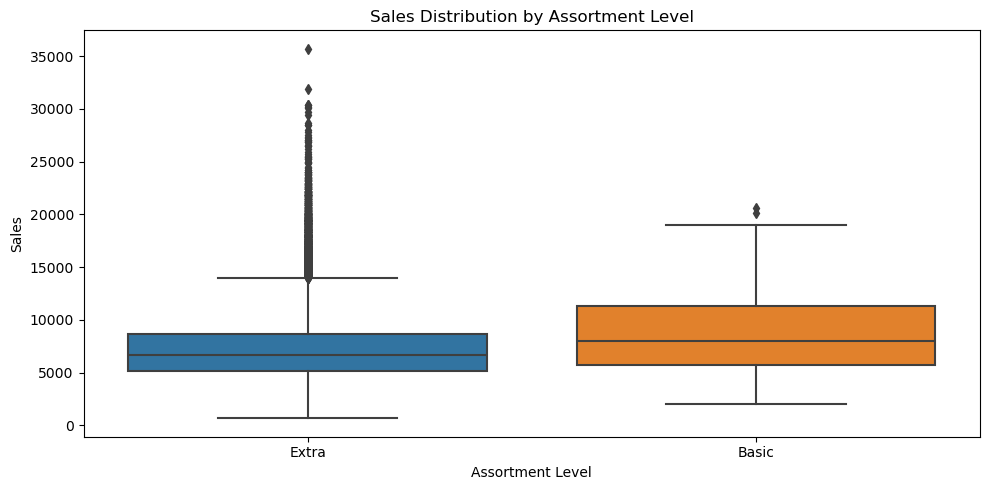

In [51]:
# Map assortment levels
assortment_map = {
    1: 'Basic',
    2: 'Extra',
    3: 'Extended'
}

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Assortment'].map(assortment_map), y=df['Sales'])
plt.title('Sales Distribution by Assortment Level')
plt.xlabel('Assortment Level')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

In [52]:
df

,Store,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
6,1,2013-01-07,1.0,7176.0,785.0,1.0,1,0,1,9.141401,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
9,1,2013-01-10,4.0,4892.0,615.0,1.0,1,0,1,7.954472,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
11,1,2013-01-12,6.0,4952.0,646.0,1.0,0,0,0,7.665635,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
14,1,2013-01-15,2.0,3900.0,512.0,1.0,0,0,0,7.617188,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
27,1,2013-01-28,1.0,4055.0,549.0,1.0,0,0,0,7.386157,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050290,1115,2015-06-22,1.0,5096.0,375.0,1.0,0,0,0,13.589333,3,2,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1050302,1115,2015-07-04,6.0,6543.0,466.0,1.0,0,0,0,14.040773,3,2,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1050307,1115,2015-07-09,4.0,5686.0,416.0,1.0,0,0,0,13.668269,3,2,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1050308,1115,2015-07-10,5.0,5844.0,404.0,1.0,0,0,0,14.465347,3,2,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [53]:
df = df.sort_values(by=['Store', 'Date']).reset_index(drop=True)

In [54]:
df

,Store,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2013-01-07,1.0,7176.0,785.0,1.0,1,0,1,9.141401,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,2013-01-10,4.0,4892.0,615.0,1.0,1,0,1,7.954472,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,2013-01-12,6.0,4952.0,646.0,1.0,0,0,0,7.665635,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2013-01-15,2.0,3900.0,512.0,1.0,0,0,0,7.617188,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,2013-01-28,1.0,4055.0,549.0,1.0,0,0,0,7.386157,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84429,1115,2015-06-22,1.0,5096.0,375.0,1.0,0,0,0,13.589333,3,2,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
84430,1115,2015-07-04,6.0,6543.0,466.0,1.0,0,0,0,14.040773,3,2,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
84431,1115,2015-07-09,4.0,5686.0,416.0,1.0,0,0,0,13.668269,3,2,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
84432,1115,2015-07-10,5.0,5844.0,404.0,1.0,0,0,0,14.465347,3,2,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [55]:
df.nunique()

Store                         1115
Date                           930
DayOfWeek                        7
Sales                        13817
Customers                     2834
Open                             1
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
SalesPerCustomer             80766
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       13
CompetitionOpenSinceYear        24
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
dtype: int64

In [56]:
# Save cleaned dataset to CSV
df.to_csv('cleaned_sales_data.csv', index=False)

# 4.0 Feature Engineering

In [57]:
import pandas as pd

# Load dataset
df_full = pd.read_csv('cleaned_sales_data.csv')

# Show basic structure
print("Dataset Shape:", df_full.shape)
print("\nColumn Names and Types:")
print(df_full.dtypes)

# Show first 5 rows
print("\nSample Records:")
print(df_full.head())

# Check for missing values
print("\nMissing Values per Column:")
print(df_full.isnull().sum())

# Check for unique values in each column (helps identify categorical features)
print("\nUnique Values per Column:")
print(df_full.nunique())

Dataset Shape: (84434, 19)

Column Names and Types:
Store                          int64
Date                          object
DayOfWeek                    float64
Sales                        float64
Customers                    float64
Open                         float64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
SalesPerCustomer             float64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

Sample Records:
   Store        Date  DayOfWeek   Sales  Customers  Open  Promo  StateHoliday  \
0      1  2013-01-07        1.0  7176.0      785.0   1.0      1             0   
1      1  2013-01-10        4.0  4892.0      615.0  

In [58]:
# Recalculate DayOfWeek
df_full['Date'] = pd.to_datetime(df_full['Date'])
df_full['DayOfWeek'] = df_full['Date'].dt.dayofweek + 1  # Monday=1

In [59]:
# Create date features (Feature engineering)
df_full['DayOfWeek'] = df_full['Date'].dt.dayofweek + 1
df_full['Month'] = df_full['Date'].dt.month
df_full['Year'] = df_full['Date'].dt.year
df_full['WeekOfYear'] = df_full['Date'].dt.isocalendar().week
df_full['IsWeekend'] = df_full['DayOfWeek'].isin([6,7]).astype(int)

In [60]:
df_full

,Store,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,WeekOfYear,IsWeekend
0,1,2013-01-07,1,7176.0,785.0,1.0,1,0,1,9.141401,...,9.0,2008.0,0,0.0,0.0,0,1,2013,2,0
1,1,2013-01-10,4,4892.0,615.0,1.0,1,0,1,7.954472,...,9.0,2008.0,0,0.0,0.0,0,1,2013,2,0
2,1,2013-01-12,6,4952.0,646.0,1.0,0,0,0,7.665635,...,9.0,2008.0,0,0.0,0.0,0,1,2013,2,1
3,1,2013-01-15,2,3900.0,512.0,1.0,0,0,0,7.617188,...,9.0,2008.0,0,0.0,0.0,0,1,2013,3,0
4,1,2013-01-28,1,4055.0,549.0,1.0,0,0,0,7.386157,...,9.0,2008.0,0,0.0,0.0,0,1,2013,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84429,1115,2015-06-22,1,5096.0,375.0,1.0,0,0,0,13.589333,...,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2015,26,0
84430,1115,2015-07-04,6,6543.0,466.0,1.0,0,0,0,14.040773,...,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",7,2015,27,1
84431,1115,2015-07-09,4,5686.0,416.0,1.0,0,0,0,13.668269,...,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",7,2015,28,0
84432,1115,2015-07-10,5,5844.0,404.0,1.0,0,0,0,14.465347,...,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",7,2015,28,0


In [61]:
# Save cleaned dataset to CSV
df_full.to_csv('feature_engineering.csv', index=False)

# 5.0 Modeling

## Split Dataset for Training and Testing

In [62]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('feature_engineering.csv')

# Split into training and testing sets
train_df = df[df['Date'] <= '2015-05-31'].copy()
test_df = df[df['Date'] >= '2015-06-01'].copy()

# Check the result
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (78609, 23)
Test shape: (5825, 23)


## 5.1 Model 1: SARIMA

### Objective 1: Forecast for Best-Performing Store (Store 262)

#### 5.1.1.1 Filter and Prepare Store 262

In [63]:
# Prepare data for Store 262
store_id = 262
store_train = train_df[train_df['Store'] == store_id].copy()
store_test = test_df[test_df['Store'] == store_id].copy()

# Drop SalesPerCustomer column
store_train.drop(columns=['SalesPerCustomer'], inplace=True, errors='ignore')
store_test.drop(columns=['SalesPerCustomer'], inplace=True, errors='ignore')

# Convert and sort dates
store_train['Date'] = pd.to_datetime(store_train['Date'])
store_test['Date'] = pd.to_datetime(store_test['Date'])
store_train = store_train.sort_values('Date').set_index('Date')
store_test = store_test.sort_values('Date').set_index('Date')

# Create time series
ts_train = store_train['Sales']
ts_test = store_test['Sales']

#### 5.1.1.2 Plot & Stationarity Check

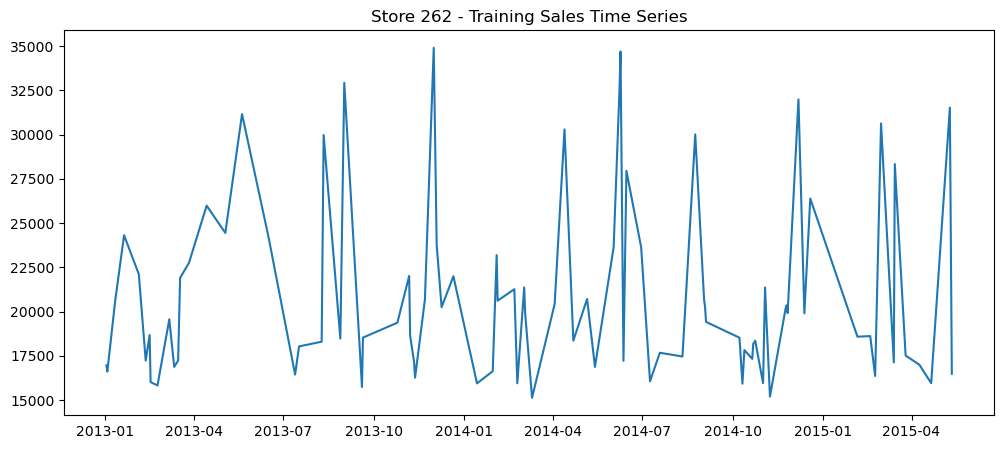

ADF Statistic: -9.052794
p-value: 0.000000
Critical Values:
   1%: -3.506
   5%: -2.895
   10%: -2.584


In [64]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# For Store 262:
plt.figure(figsize=(12,5))
plt.plot(ts_train)
plt.title("Store 262 - Training Sales Time Series")
plt.show()

result = adfuller(ts_train)
print(f"ADF Statistic: {result[0]:.6f}")
print(f"p-value: {result[1]:.6f}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value:.3f}")

#### 5.1.1.3 ACF and PACF Plots

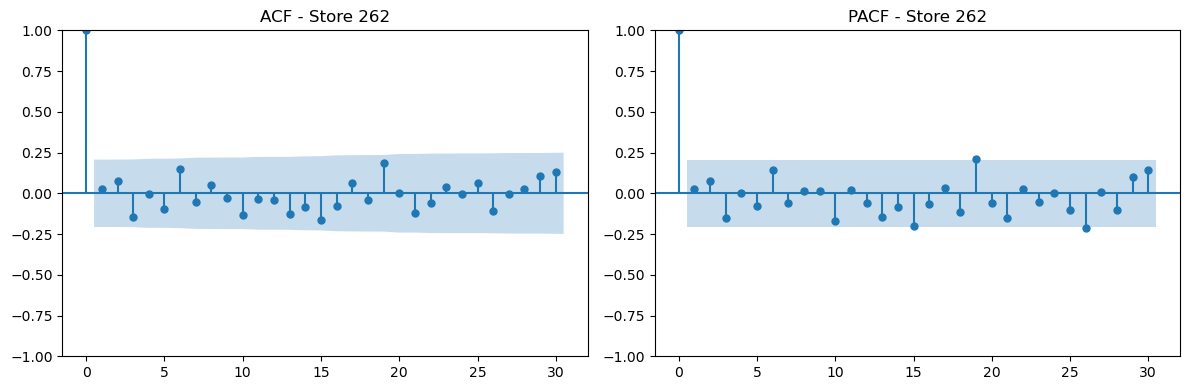

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# For Store 262:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(ts_train, lags=30, ax=axes[0])
axes[0].set_title('ACF - Store 262')
plot_pacf(ts_train, lags=30, ax=axes[1])
axes[1].set_title('PACF - Store 262')
plt.tight_layout()
plt.show()

#### 5.1.1.4 SARIMA for Store 262

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')


order = (1, 1, 1)
seasonal_order = (1, 0, 1, 7)

sarima_model = SARIMAX(ts_train, order=order, seasonal_order=seasonal_order,
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)
forecast = sarima_result.get_forecast(steps=len(ts_test)).predicted_mean
forecast.index = ts_test.index

#### 5.1.1.5 SARIMAX for Store 262

In [67]:
# Prepare exogenous features
store_train['IsHoliday'] = store_train['StateHoliday'].apply(lambda x: 0 if x == 0 else 1)
store_test['IsHoliday'] = store_test['StateHoliday'].apply(lambda x: 0 if x == 0 else 1)
exog_cols = ['Promo', 'IsHoliday', 'SchoolHoliday', 'IsWeekend']
exog_train = store_train[exog_cols]
exog_test = store_test[exog_cols]

sarimax_model = SARIMAX(ts_train, exog=exog_train, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
sarimax_result = sarimax_model.fit(disp=False)
forecast_exog = sarimax_result.get_forecast(steps=len(ts_test), exog=exog_test).predicted_mean
forecast_exog.index = ts_test.index

#### 5.1.1.6 Residual Analysis, Metrics, and Combined Plot (Store 262)

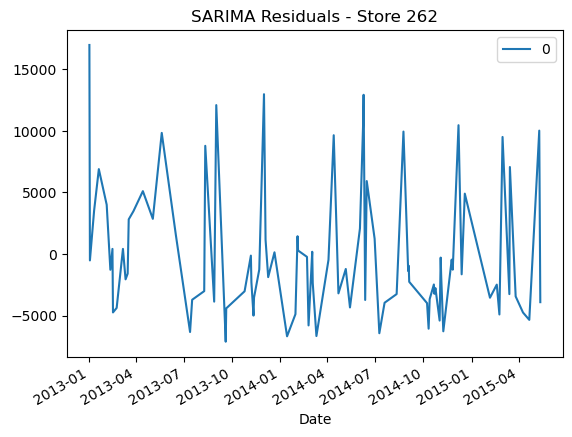

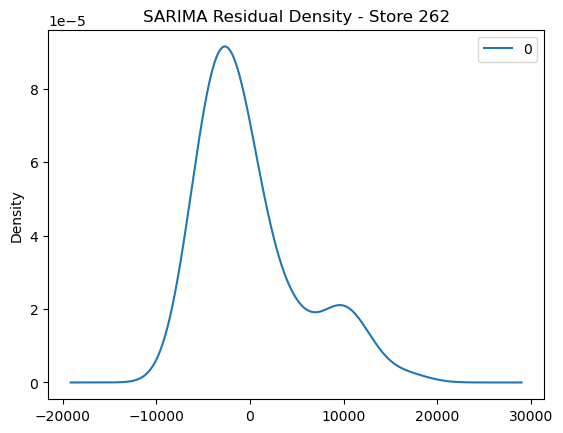

In [68]:
# SARIMA Residuals
residuals = pd.DataFrame(sarima_result.resid)
residuals.plot(title="SARIMA Residuals - Store 262")
plt.show()
residuals.plot(kind='kde', title="SARIMA Residual Density - Store 262")
plt.show()

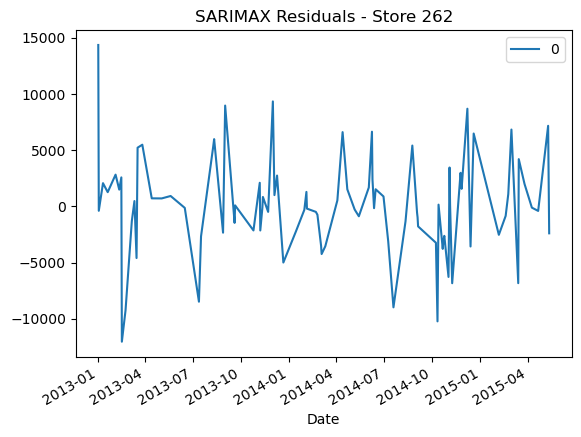

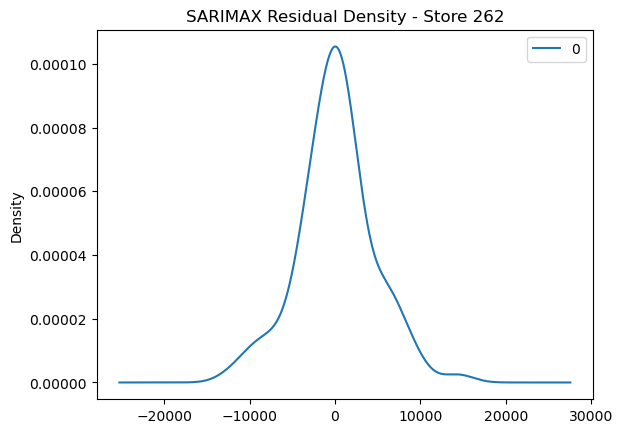

In [69]:
# SARIMAX Residuals
residuals_exog = pd.DataFrame(sarimax_result.resid)
residuals_exog.plot(title="SARIMAX Residuals - Store 262")
plt.show()
residuals_exog.plot(kind='kde', title="SARIMAX Residual Density - Store 262")
plt.show()

In [70]:
# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(ts_test, forecast)
rmse = np.sqrt(mean_squared_error(ts_test, forecast))
rmspe = np.sqrt(np.mean(np.square((ts_test.values - forecast.values) / ts_test.values))) * 100

mae_exog = mean_absolute_error(ts_test, forecast_exog)
rmse_exog = np.sqrt(mean_squared_error(ts_test, forecast_exog))
rmspe_exog = np.sqrt(np.mean(np.square((ts_test.values - forecast_exog.values) / ts_test.values))) * 100

print(f"Store 262 SARIMA - MAE: {mae:.2f} | RMSE: {rmse:.2f} | RMSPE: {rmspe:.2f}%")
print(f"Store 262 SARIMAX - MAE: {mae_exog:.2f} | RMSE: {rmse_exog:.2f} | RMSPE: {rmspe_exog:.2f}%")

Store 262 SARIMA - MAE: 4459.33 | RMSE: 4820.74 | RMSPE: 23.37%
Store 262 SARIMAX - MAE: 3342.43 | RMSE: 4182.15 | RMSPE: 23.45%


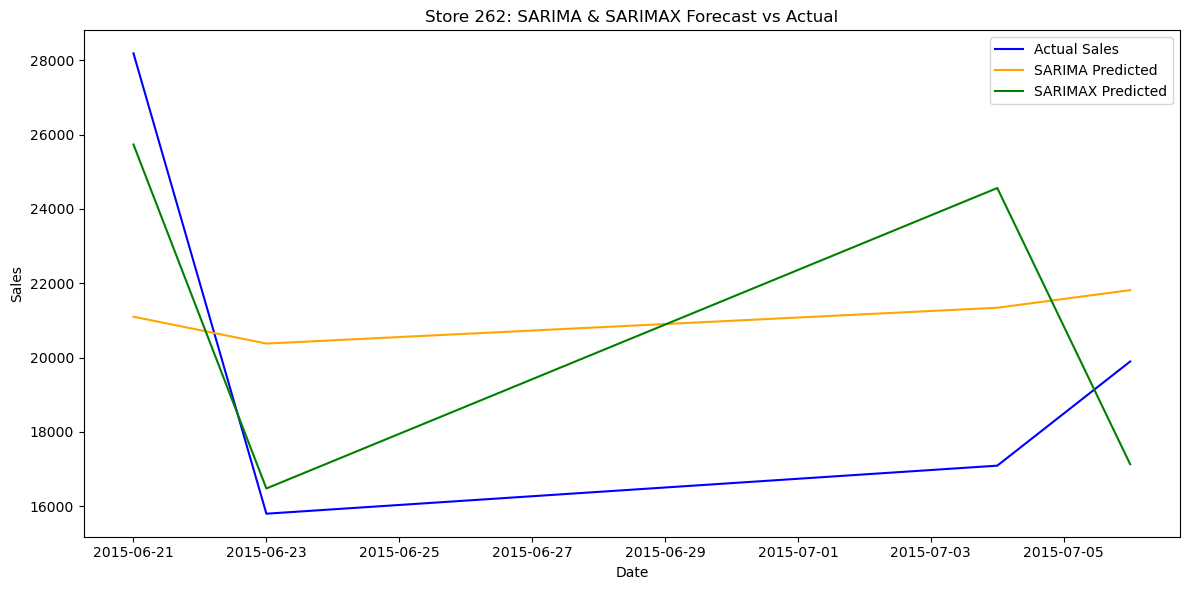

In [71]:
# Plot actual vs both forecasts
plt.figure(figsize=(12, 6))
plt.plot(ts_test.index, ts_test, label='Actual Sales', color='b')
plt.plot(ts_test.index, forecast, label='SARIMA Predicted', color='orange')
plt.plot(ts_test.index, forecast_exog, label='SARIMAX Predicted', color='green')
plt.title("Store 262: SARIMA & SARIMAX Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

### 5.1.2 Objective 2: Global Average Sales Across All Stores

#### 5.1.2.1 Aggregate Average Sales

In [72]:
# Drop SalesPerCustomer column if it exists
train_df.drop(columns=['SalesPerCustomer'], inplace=True, errors='ignore')
test_df.drop(columns=['SalesPerCustomer'], inplace=True, errors='ignore')

# Convert Date to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Global daily average sales
global_train = train_df.groupby('Date')['Sales'].mean().to_frame(name='AvgSales').sort_index()
global_test = test_df.groupby('Date')['Sales'].mean().to_frame(name='AvgSales').sort_index()

# Extract time series
ts_train_g = global_train['AvgSales']
ts_test_g = global_test['AvgSales']

#### 5.1.2.2 Plot & Stationarity Check

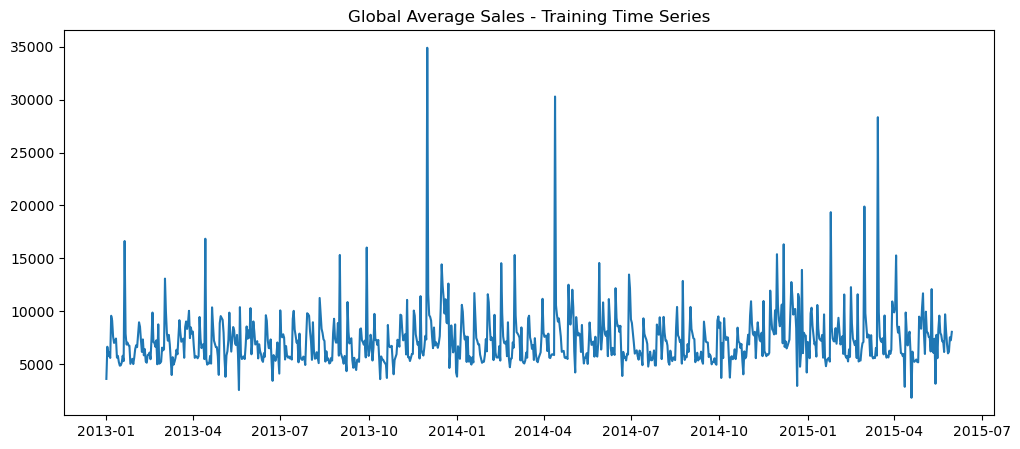

ADF Statistic: -5.452811
p-value: 0.000003
Critical Values:
   1%: -3.438
   5%: -2.865
   10%: -2.569


In [73]:
plt.figure(figsize=(12,5))
plt.plot(ts_train_g)
plt.title("Global Average Sales - Training Time Series")
plt.show()

from statsmodels.tsa.stattools import adfuller
result_g = adfuller(ts_train_g)
print(f"ADF Statistic: {result_g[0]:.6f}")
print(f"p-value: {result_g[1]:.6f}")
print("Critical Values:")
for key, value in result_g[4].items():
    print(f"   {key}: {value:.3f}")

#### 5.1.2.3 ACF and PACF Plots

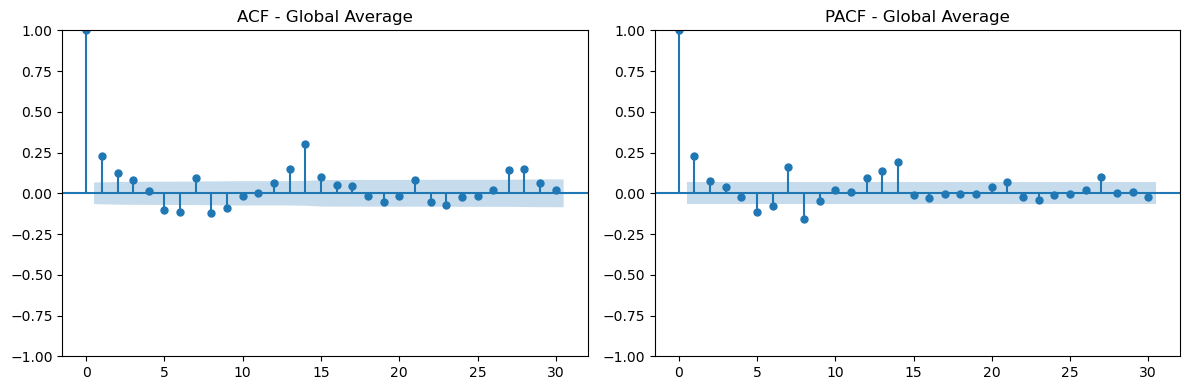

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(ts_train_g, lags=30, ax=axes[0])
axes[0].set_title('ACF - Global Average')
plot_pacf(ts_train_g, lags=30, ax=axes[1])
axes[1].set_title('PACF - Global Average')
plt.tight_layout()
plt.show()

#### 5.1.2.4 Auto Arima for Global Sales

In [75]:
import pmdarima as pm

auto_model_g = pm.auto_arima(
    ts_train_g,
    seasonal=True,
    m=7,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
print("Best order:", auto_model_g.order, auto_model_g.seasonal_order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=16453.692, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=16231.968, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=16089.025, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=16451.695, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=16082.644, Time=0.35 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=16080.957, Time=0.69 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=16388.992, Time=0.50 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=inf, Time=2.20 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=16079.282, Time=0.6

In [76]:
order_g = (0, 1, 1)
seasonal_order_g = (1, 0, 0, 7)

#### 5.1.2.5 SARIMA Modeling for Global Series

In [77]:
sarima_model_g = SARIMAX(ts_train_g, order=order_g, seasonal_order=seasonal_order_g,
                         enforce_stationarity=False, enforce_invertibility=False)
sarima_result_g = sarima_model_g.fit(disp=False)
forecast_g = sarima_result_g.get_forecast(steps=len(ts_test_g)).predicted_mean
forecast_g.index = ts_test_g.index

#### 5.1.2.6 SARIMAX (with exog) for Global Series

In [78]:
# Prepare exogenous features (aggregated as max for binary)
train_df['IsHoliday'] = train_df['StateHoliday'].apply(lambda x: 0 if x == 0 else 1)
test_df['IsHoliday'] = test_df['StateHoliday'].apply(lambda x: 0 if x == 0 else 1)
exog_cols = ['Promo', 'IsHoliday', 'SchoolHoliday', 'IsWeekend']
exog_train_g = train_df.groupby('Date')[exog_cols].max().sort_index()
exog_test_g = test_df.groupby('Date')[exog_cols].max().sort_index()

# Align exog to time series index
exog_train_g = exog_train_g.loc[ts_train_g.index]
exog_test_g = exog_test_g.loc[ts_test_g.index]

sarimax_model_g = SARIMAX(ts_train_g, exog=exog_train_g, order=order_g, seasonal_order=seasonal_order_g,
                          enforce_stationarity=False, enforce_invertibility=False)
sarimax_result_g = sarimax_model_g.fit(disp=False)
forecast_exog_g = sarimax_result_g.get_forecast(steps=len(ts_test_g), exog=exog_test_g).predicted_mean
forecast_exog_g.index = ts_test_g.index

#### 5.1.2.7 Residual Analysis, Metrics, and Combined Plot (Global Series)

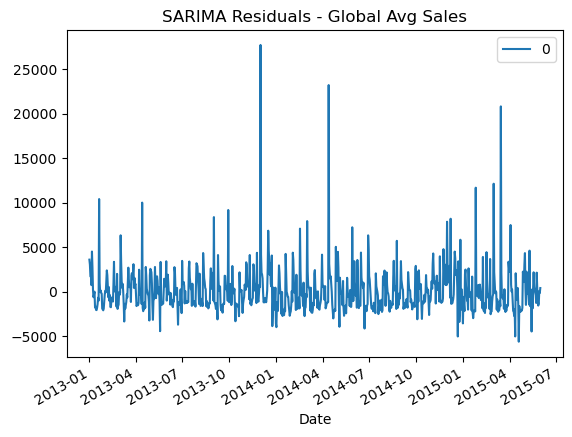

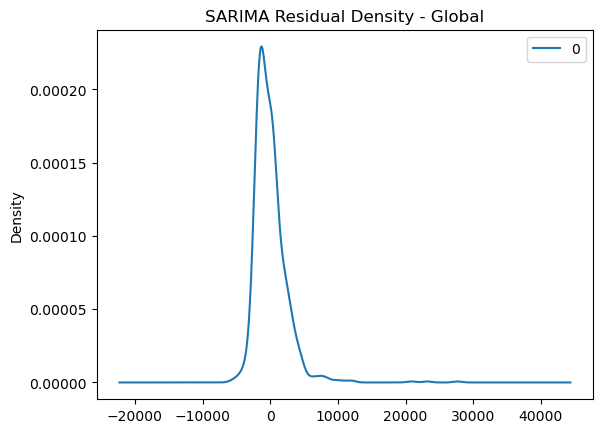

In [79]:
# SARIMA Residuals
resid_g = pd.DataFrame(sarima_result_g.resid)
resid_g.plot(title="SARIMA Residuals - Global Avg Sales")
plt.show()
resid_g.plot(kind='kde', title="SARIMA Residual Density - Global")
plt.show()

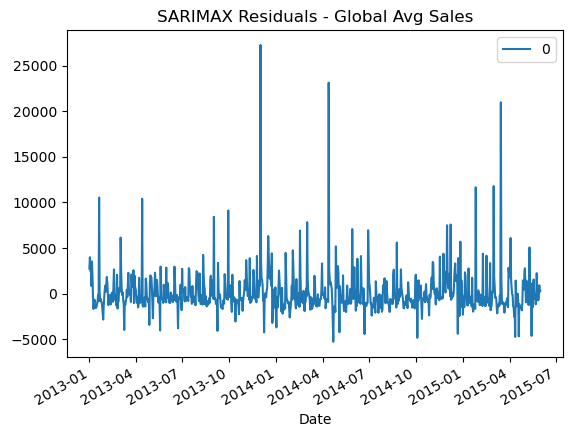

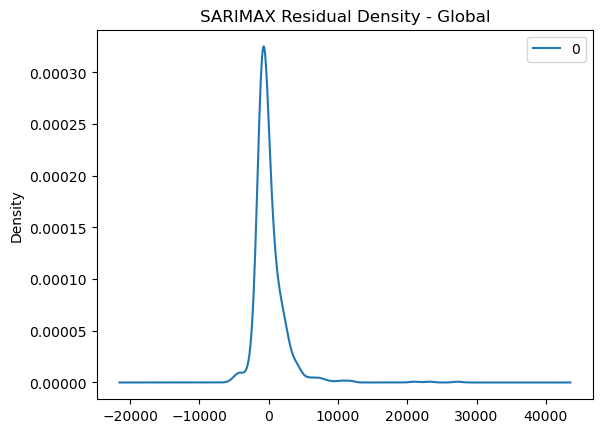

In [80]:
# SARIMAX Residuals
resid_exog_g = pd.DataFrame(sarimax_result_g.resid)
resid_exog_g.plot(title="SARIMAX Residuals - Global Avg Sales")
plt.show()
resid_exog_g.plot(kind='kde', title="SARIMAX Residual Density - Global")
plt.show()

In [81]:
# Metrics
mae_g = mean_absolute_error(ts_test_g, forecast_g)
rmse_g = np.sqrt(mean_squared_error(ts_test_g, forecast_g))
rmspe_g = np.sqrt(np.mean(np.square((ts_test_g.values - forecast_g.values) / ts_test_g.values))) * 100

mae_exog_g = mean_absolute_error(ts_test_g, forecast_exog_g)
rmse_exog_g = np.sqrt(mean_squared_error(ts_test_g, forecast_exog_g))
rmspe_exog_g = np.sqrt(np.mean(np.square((ts_test_g.values - forecast_exog_g.values) / ts_test_g.values))) * 100

print(f"Global SARIMA - MAE: {mae_g:.2f} | RMSE: {rmse_g:.2f} | RMSPE: {rmspe_g:.2f}%")
print(f"Global SARIMAX - MAE: {mae_exog_g:.2f} | RMSE: {rmse_exog_g:.2f} | RMSPE: {rmspe_exog_g:.2f}%")

Global SARIMA - MAE: 1530.12 | RMSE: 1812.05 | RMSPE: 26.95%
Global SARIMAX - MAE: 1199.65 | RMSE: 1508.61 | RMSPE: 21.97%


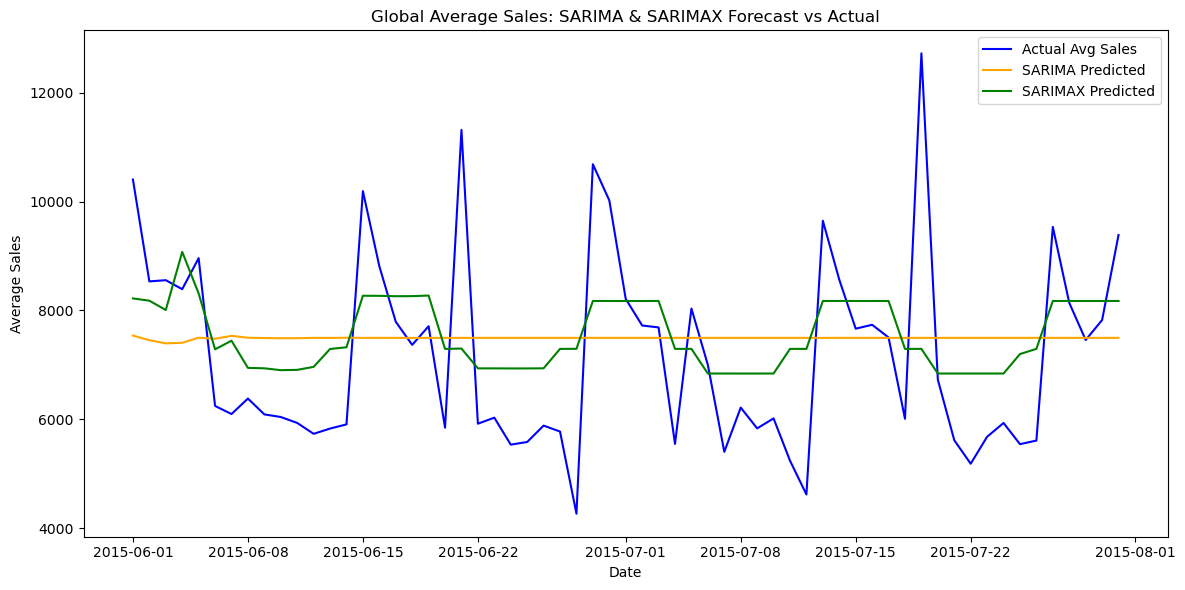

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(ts_test_g.index, ts_test_g, label='Actual Avg Sales', color='b')
plt.plot(ts_test_g.index, forecast_g, label='SARIMA Predicted', color='orange')
plt.plot(ts_test_g.index, forecast_exog_g, label='SARIMAX Predicted', color='green')
plt.title("Global Average Sales: SARIMA & SARIMAX Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.legend()
plt.tight_layout()
plt.show()

## 5.2 Model 2: CatBoost

In [83]:
#!pip install catboost

In [84]:
# General libraries and utility functions
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, ParameterGrid
import matplotlib.pyplot as plt

In [85]:
def rmspe(y_true, y_pred):
    epsilon = 1e-10
    return np.sqrt(np.mean(((y_true - y_pred) / (y_true + epsilon))**2))

Data leakage checks were done for both objective 1 and objective 2 by shuffling the target and retraining. This is to make sure that the model's original predictive power was not because of data leakage.

In [86]:
def shuffled_target_check(train_df, val_df, features, cat_features, original_target_col='Sales'):
    print("Shuffled Target Check:")

    shuffled_train_df = train_df.copy()
    shuffled_train_df['ShuffledTarget'] = np.random.permutation(shuffled_train_df[original_target_col].values)

    train_pool_shuffled = Pool(shuffled_train_df[features], shuffled_train_df['ShuffledTarget'], cat_features=cat_features)
    val_pool_shuffled = Pool(val_df[features], val_df[original_target_col], cat_features=cat_features)

    model = CatBoostRegressor(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        eval_metric='RMSE',
        random_seed=42,
        early_stopping_rounds=30,
        verbose=False
    )
    model.fit(train_pool_shuffled, eval_set=val_pool_shuffled, use_best_model=True)

    val_preds = model.predict(val_df[features])
    rmse_val = np.sqrt(mean_squared_error(val_df[original_target_col], val_preds))

    print(f"RMSE with Shuffled Target: {rmse_val:.4f}")

### 5.2.1 CatBoost Objective 1: Forecast for Best-Performing Store (Store 262)

For objective 1, data for the best performing store (Store 262) was isolated. Also double confirmed that days when the store was closed were excluded by using (Open == 1). This will ensures that the model focuses only on operational days.

#### 5.2.1.1 Data Filtering and Preprocessing

In [87]:
# Load and preprocess
df = pd.read_csv('feature_engineering.csv', parse_dates=['Date'])
df = df[(df['Open'] == 1) & (df['Store'] == 262)].copy()

In [88]:
# Check date range
print("Store 262 Date Range:")
print(f"From: {df['Date'].min().date()}")
print(f"To:   {df['Date'].max().date()}")

Store 262 Date Range:
From: 2013-01-02
To:   2015-07-06


In [89]:
# Feature engineering
df['DayOfWeek'] = df['Date'].dt.dayofweek + 1
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
df['IsWeekend'] = df['DayOfWeek'].isin([6, 7]).astype(int)   
df['Lag1'] = df['Sales'].shift(1)
df['Lag7'] = df['Sales'].shift(7)
df['Rolling7'] = df['Sales'].shift(1).rolling(window=7).mean()
df.dropna(inplace=True)

Since this analysis is to predict future sales, 'Customers' was removed from the features. This is because the number of customers is not known in advance for future dates. It is actually an outcome rather than a feature. Including 'Customers' would introduce bias to the model by using "future" knowledge.

#### 5.2.1.2 Train-Test Split and Dataset Inspection

In [90]:
# Split and prepare data
target = 'Sales'
features = [
        'Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType',
        'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear',
        'PromoInterval', 'Month', 'Year', 'WeekOfYear', 'IsWeekend', 
        'Lag1', 'Lag7', 'Rolling7'
    ]
cat_features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
                    'StoreType', 'Assortment', 'Promo2', 'PromoInterval']

for col in cat_features:
    df[col] = df[col].astype(str)

In [91]:
train_df = df[df['Date'] <= '2015-05-31'].copy()
test_df = df[df['Date'] >= '2015-06-01'].copy()
train_sub_df, val_df = train_test_split(train_df, test_size=0.15, random_state=42)

In [92]:
train_pool = Pool(train_sub_df[features], train_sub_df[target], cat_features=cat_features)
val_pool = Pool(val_df[features], val_df[target], cat_features=cat_features)
test_pool = Pool(test_df[features], cat_features=cat_features)

In [93]:
# Check Store 262's structure for test and test sets
def inspect_dataset(df, name):
    print(f"Inspecting {name} dataset")
    print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
    df_sorted = df.sort_values('Date')
    
    # Check unique dates
    unique_dates = df_sorted['Date'].unique()
    print(f"Number of unique dates: {len(unique_dates)}")
    print(f"Sample unique dates: {unique_dates[:5]} ... {unique_dates[-5:]}")
    
    # Check differences between dates (frequency)
    date_diffs = df_sorted['Date'].diff().dropna()
    print("Date differences frequency:")
    print(date_diffs.value_counts())
    
    # Show a sample of relevant columns
    print(f"\nSample data from {name}:")
    print(df_sorted[['Date', 'Open', 'Sales']].head(10))

# Usage
inspect_dataset(train_df, "Train")
inspect_dataset(test_df, "Test")

Inspecting Train dataset
Date range: 2013-02-16 00:00:00 to 2015-05-12 00:00:00
Number of unique dates: 83
Sample unique dates: <DatetimeArray>
['2013-02-16 00:00:00', '2013-02-23 00:00:00', '2013-03-07 00:00:00',
 '2013-03-12 00:00:00', '2013-03-16 00:00:00']
Length: 5, dtype: datetime64[ns] ... <DatetimeArray>
['2015-03-26 00:00:00', '2015-04-09 00:00:00', '2015-04-21 00:00:00',
 '2015-05-10 00:00:00', '2015-05-12 00:00:00']
Length: 5, dtype: datetime64[ns]
Date differences frequency:
Date
1 days     13
4 days      6
2 days      6
9 days      5
3 days      5
6 days      4
12 days     4
7 days      3
8 days      3
10 days     3
23 days     3
13 days     3
17 days     3
19 days     3
5 days      3
27 days     2
11 days     2
16 days     2
14 days     2
18 days     2
34 days     1
35 days     1
15 days     1
24 days     1
48 days     1
Name: count, dtype: int64

Sample data from Train:
            Date  Open    Sales
19672 2013-02-16   1.0  16018.0
19673 2013-02-23   1.0  15830.0
19674 

The train set for Store 262 has 83 unique dates and irregular date gaps. The test set for Store 262 only contains 4 records. This means that the dataset is sparse and unevenly spaced. This might impact the model's ability to properly capture temporal patterns. However, the data appears consistent with expected store opening days. This means that there is no inconsistencies in the recorded dates.

#### 5.2.1.3 Model Training and Hyperparameter Tuning

In [94]:
# Hyperparameter tuning for Store 262
param_grid = {
        'iterations': [500, 1000],
        'learning_rate': [0.05, 0.1],
        'depth': [4, 6, 8]
    }
best_model = None
best_rmse = float('inf')
best_params = None

In [95]:
for params in ParameterGrid(param_grid):
        print(f"Training with params: {params}")
        model = CatBoostRegressor(
            iterations=params['iterations'],
            learning_rate=params['learning_rate'],
            depth=params['depth'],
            eval_metric='RMSE',
            random_seed=42,
            early_stopping_rounds=50,
            verbose=100
        )
        model.fit(train_pool, eval_set=val_pool, use_best_model=True)
        val_preds = model.predict(val_pool)
        rmse = np.sqrt(mean_squared_error(val_df[target], val_preds))
        print(f"Validation RMSE: {rmse:.2f}")
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_params = params

Training with params: {'depth': 4, 'iterations': 500, 'learning_rate': 0.05}
0:	learn: 5163.4749454	test: 4274.7340902	best: 4274.7340902 (0)	total: 151ms	remaining: 1m 15s
100:	learn: 2127.3394097	test: 2645.1022885	best: 2614.2427473 (85)	total: 1.26s	remaining: 4.99s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 2563.996998
bestIteration = 127

Shrink model to first 128 iterations.
Validation RMSE: 2564.00
Training with params: {'depth': 4, 'iterations': 500, 'learning_rate': 0.1}
0:	learn: 5047.6370582	test: 4148.5408602	best: 4148.5408602 (0)	total: 10.2ms	remaining: 5.09s
100:	learn: 1472.7625573	test: 2427.6757634	best: 2270.5330590 (64)	total: 1.22s	remaining: 4.82s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 2270.533059
bestIteration = 64

Shrink model to first 65 iterations.
Validation RMSE: 2270.53
Training with params: {'depth': 4, 'iterations': 1000, 'learning_rate': 0.05}
0:	learn: 5163.4749454	test: 4274.7340902	best: 4274.734090

In [96]:
print(f"\nBest Hyperparameters: {best_params}")
print(f"Best RMSE on validation set: {best_rmse:.2f}")


Best Hyperparameters: {'depth': 4, 'iterations': 500, 'learning_rate': 0.1}
Best RMSE on validation set: 2270.53


#### 5.2.1.4 Model Evaluation on Test Set

In [97]:
# Evaluate on test set
test_df['Predicted'] = best_model.predict(test_pool)
mae = mean_absolute_error(test_df[target], test_df['Predicted'])
rmse = np.sqrt(mean_squared_error(test_df[target], test_df['Predicted']))
rmspe_val = rmspe(test_df[target].values, test_df['Predicted'].values)

print("\nModel Performance on Test Set:")
print(f"MAE:   {mae:.2f}")
print(f"RMSE:  {rmse:.2f}")
print(f"RMSPE: {rmspe_val * 100:.2f}%")


Model Performance on Test Set:
MAE:   1139.10
RMSE:  1481.44
RMSPE: 7.80%


#### 5.2.1.5 Data Leakage Check (Objective 1)

In [98]:
# Leakage check
shuffled_target_check(train_sub_df, val_df, features, cat_features, original_target_col=target)

Shuffled Target Check:
RMSE with Shuffled Target: 4146.9285


Shuffled target check has high RMSE. Thus, no data leak.

#### 5.2.1.6 Visualizations and Interpretions (Objective 1)

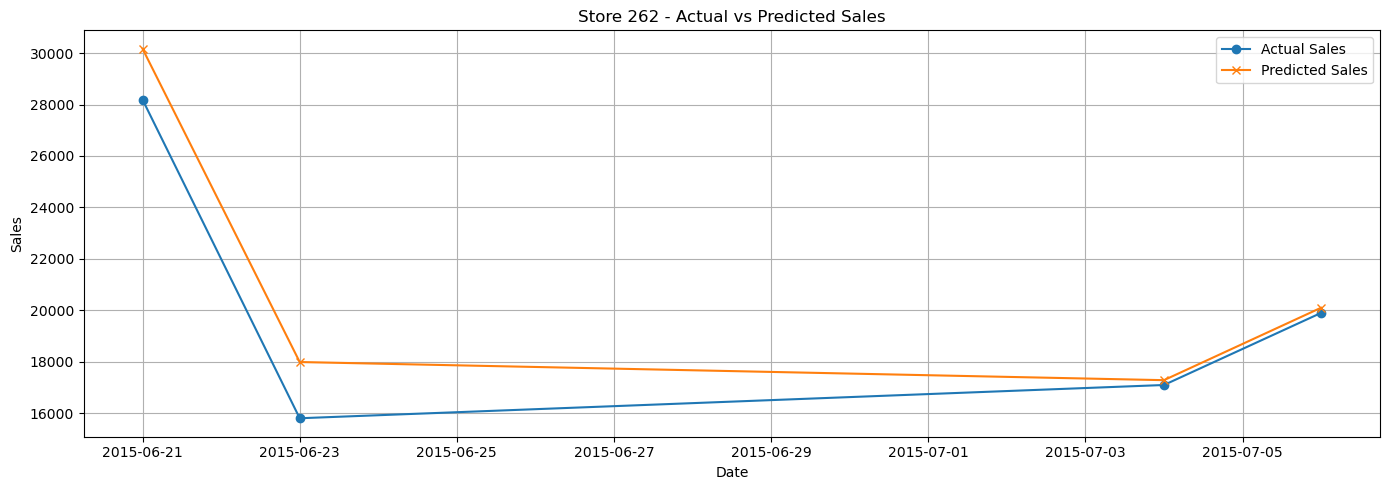

In [99]:
# Plot actual vs predicted
plt.figure(figsize=(14, 5))
plt.plot(test_df['Date'], test_df[target], label='Actual Sales', marker='o')
plt.plot(test_df['Date'], test_df['Predicted'], label='Predicted Sales', marker='x')
plt.title('Store 262 - Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<B>Insights<B>

From the "Actual vs Predicted Sales" plot of Store 262, there is a consistent over-forecasting where the predicted sales (orange) are higher than the actual sales (blue). Regardless of the over-forecasting, the model appears to have captured the general direction of the trend in sales wherein there was a dip from 21st to 23rd June 2015 which increased by the end of the forecast horizon. Notably, the performance by the end of the test period was particularly accurate. The predicted sales closely matched the actual sales (~20000). 

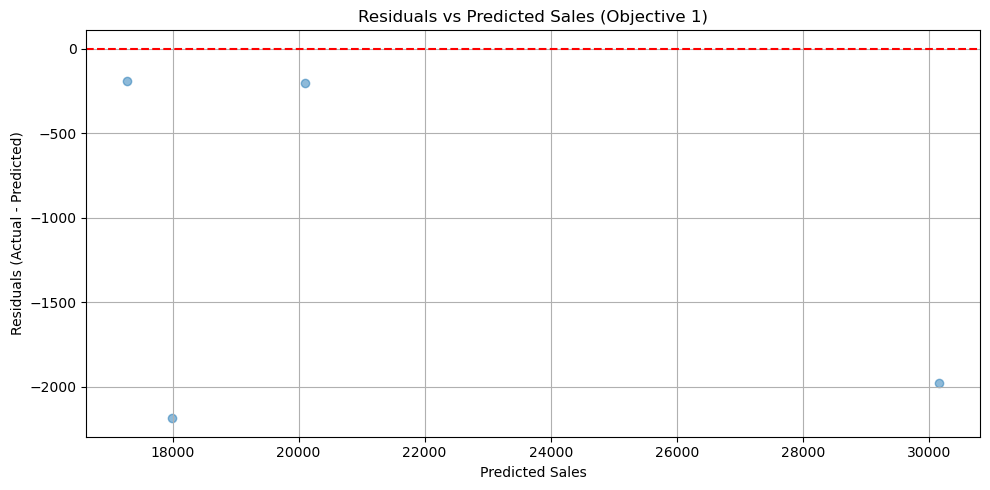

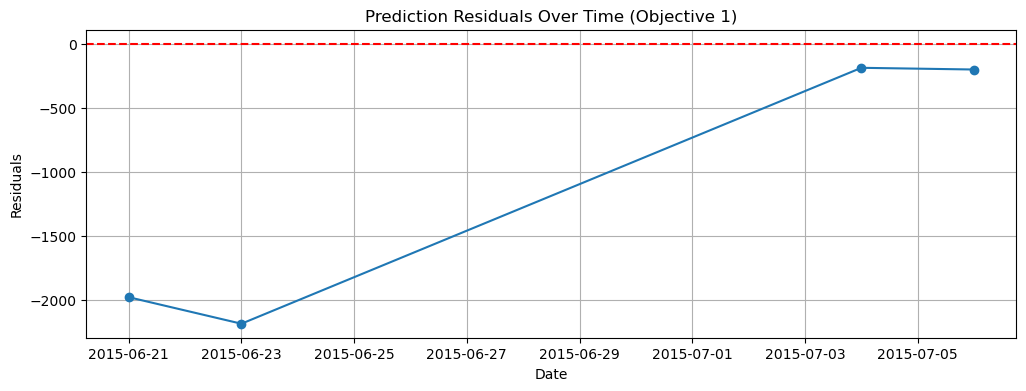

In [100]:
# Plot residual plots
residuals = test_df['Sales'] - test_df['Predicted']
plt.figure(figsize=(10, 5))
plt.scatter(test_df['Predicted'], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Sales (Objective 1)")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(test_df['Date'], residuals, marker='o', linestyle='-')
plt.axhline(0, linestyle='--', color='red')
plt.title("Prediction Residuals Over Time (Objective 1)")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

<B>Insights <B>

From the "Residuals vs Predicted sales" plot, all data points of the residuals are negative. This means that the predicted sales are consistently higher than the actual sales. The CatBoost model is over-forecasting for Store 262. The over-forecasting ranges from -250 to -2000. There does not seem to be a clear trend in the residuals as the predicted sales increase. This might suggest that the over-forecasting is generally consistent across the predicted sales values.

Similarly, from the "Prediction residuals over time" plot, all residuals are negative. There was a dip from 21st June to 23rd June 2015 which shows a more over-forecasting. However, there is an increasing trend meaning that the model's over-forecasting was becoming less severe over the period of 23rd June 2015 onwards. Around the end of the plotted period, the residuals appear to stabilize which could mean a more consistent level of over-forecasting.

Overall for objective 1, the model consistently over-forecasts sales. This means that the model's current performance for localized decision making such as for inventory control or workforce scheduling is suboptimal. Over-forecasting can lead to issues such as excess inventory, overstaffing and ineffective promotions.

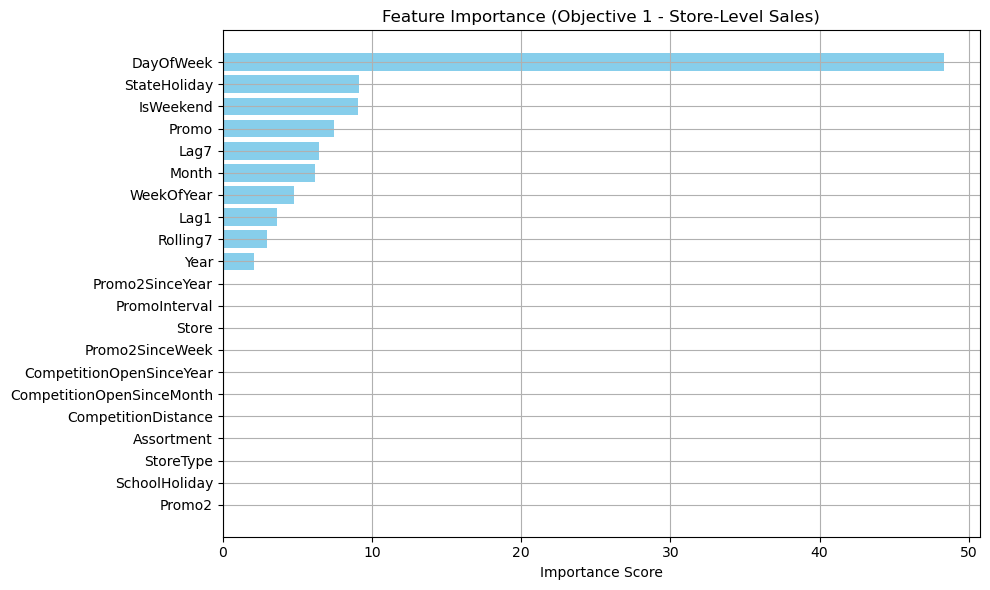

In [101]:
# Plot feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.get_feature_importance(train_pool)
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance (Objective 1 - Store-Level Sales)")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

<B>Insights<B>

The feature importance plot of objective 1 reveals the most significant drivers in predicting store sales for each individual shop. DayOfWeek is the most significant feature by far, reflecting strong weekly sales patterns typical in retailing. State holidays (StateHoliday) and weekend (IsWeekend) are also highly important, reflecting their strong impact on customers' behavior. Other time-related features like Month and WeekOfYear have medium impact, whereas store-specific attributes and competition-related features have a weak impact. Overall, this model gives greater emphasis to calendar and promotional effects than to recent sales changes.

### 5.2.2 CatBoost Objective 2: Global Average Sales Across All Stores

For objective 2, daily average sales is first computed. This will aggregate all stores to a single time series.

#### 5.2.2.1 Data Aggregation and Preprocessing

In [102]:
# Load and preprocess
df = pd.read_csv('feature_engineering.csv', parse_dates=['Date'])
agg_df = df[df['Open'] == 1].groupby('Date')['Sales'].mean().reset_index()
agg_df.rename(columns={'Sales': 'AvgSales'}, inplace=True)
agg_df['Date'] = pd.to_datetime(agg_df['Date'])

In [103]:
# Check date range
print("Global Average Sales Data Range:")
print(f"From: {agg_df['Date'].min().date()}")
print(f"To:   {agg_df['Date'].max().date()}")

Global Average Sales Data Range:
From: 2013-01-01
To:   2015-07-31


In [104]:
# Feature engineering
agg_df['DayOfWeek'] = agg_df['Date'].dt.dayofweek + 1
agg_df['Month'] = agg_df['Date'].dt.month
agg_df['Year'] = agg_df['Date'].dt.year
agg_df['WeekOfYear'] = agg_df['Date'].dt.isocalendar().week.astype(int)
agg_df['IsWeekend'] = agg_df['DayOfWeek'].isin([6, 7]).astype(int)
agg_df['DaysSinceStart'] = (agg_df['Date'] - agg_df['Date'].min()).dt.days 
agg_df['Lag1'] = agg_df['AvgSales'].shift(1)
agg_df['Lag7'] = agg_df['AvgSales'].shift(7)
agg_df['Rolling7'] = agg_df['AvgSales'].shift(1).rolling(window=7).mean()
agg_df['Rolling14'] = agg_df['AvgSales'].shift(1).rolling(window=14).mean()
agg_df['SalesDiff1'] = agg_df['AvgSales'].diff()
agg_df['SalesDiff7'] = agg_df['AvgSales'].diff(7)
agg_df.dropna(inplace=True)

#### 5.2.2.2 Dataset Inspection and Structure

In [105]:
# Prepare train/test split
target = 'AvgSales'
features = [
    'DayOfWeek', 'Month', 'Year', 'WeekOfYear', 'IsWeekend',
    'Lag1', 'Lag7', 'Rolling7', 'Rolling14',
    'DaysSinceStart', 'SalesDiff1', 'SalesDiff7'
]
cat_features = []

In [106]:
train_agg_df = agg_df[agg_df['Date'] <= '2015-05-31'].copy()
test_agg_df = agg_df[agg_df['Date'] >= '2015-06-01'].copy()   
train_sub_df, val_df = train_test_split(train_agg_df, test_size=0.15, random_state=42)    
train_pool = Pool(train_sub_df[features], train_sub_df[target], cat_features=cat_features)
val_pool = Pool(val_df[features], val_df[target], cat_features=cat_features)
test_pool = Pool(test_agg_df[features], cat_features=cat_features)

In [107]:
# Function to inspect dataset structure for Objective 2 (Global Model)
def inspect_dataset(df, name):
    print(f"Inspecting {name} dataset")
    print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
    df_sorted = df.sort_values('Date')
    
    # Check unique dates
    unique_dates = df_sorted['Date'].unique()
    print(f"Number of unique dates: {len(unique_dates)}")
    print(f"Sample unique dates: {unique_dates[:5]} ... {unique_dates[-5:]}")
    
    # Check differences between dates (frequency)
    date_diffs = df_sorted['Date'].diff().dropna()
    print("Date differences frequency:")
    print(date_diffs.value_counts())
    
    # Show a sample of relevant columns (features + target)
    print(f"\nSample data from {name}:")
    print(df_sorted[['Date'] + features + [target]].head(10))


# Usage with Objective 2 datasets
inspect_dataset(train_agg_df, "Train Aggregated")
inspect_dataset(val_df, "Validation Aggregated")
inspect_dataset(test_agg_df, "Test Aggregated")

Inspecting Train Aggregated dataset
Date range: 2013-01-15 00:00:00 to 2015-05-31 00:00:00
Number of unique dates: 855
Sample unique dates: <DatetimeArray>
['2013-01-15 00:00:00', '2013-01-16 00:00:00', '2013-01-17 00:00:00',
 '2013-01-18 00:00:00', '2013-01-19 00:00:00']
Length: 5, dtype: datetime64[ns] ... <DatetimeArray>
['2015-05-27 00:00:00', '2015-05-28 00:00:00', '2015-05-29 00:00:00',
 '2015-05-30 00:00:00', '2015-05-31 00:00:00']
Length: 5, dtype: datetime64[ns]
Date differences frequency:
Date
1 days    842
2 days     12
Name: count, dtype: int64

Sample data from Train Aggregated:
         Date  DayOfWeek  Month  Year  WeekOfYear  IsWeekend          Lag1  \
14 2013-01-15          2      1  2013           3          0   5181.063063   
15 2013-01-16          3      1  2013           3          0   4848.101852   
16 2013-01-17          4      1  2013           3          0   4883.142857   
17 2013-01-18          5      1  2013           3          0   5148.393939   
18 2013-01-

The training set for objective 1 contains 855 daily records. This allows the model to better capture temporal trends more effectively. The test set contains 61 consecutive daily records which is more consistent than that of objective 2's test set (only 4 records) as well.

Compared to Objective 1 that only focused on Store 262 with sparse and irregular data, Objective 2 is a globally aggregated time series. Although some individual stores may be closed on some days, other stores remain open. This ensures that an average sales value can be calculated consistently for each date. Because of this, even though Objective 1 and 2 spans the same time period, Objective 2 resulted in a much denser and more consistent temporal structure.

#### 5.2.2.3 Model Training and Hyperparameter Tuning

In [108]:
# Hyperparameter tuning
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.05, 0.1],
    'depth': [4, 6, 8]
}
best_model = None
best_rmse = float('inf')
best_params = None

In [109]:
for params in ParameterGrid(param_grid):
    print(f"\nTraining with params: {params}")
    model = CatBoostRegressor(
        iterations=params['iterations'],
        learning_rate=params['learning_rate'],
        depth=params['depth'],
        eval_metric='RMSE',
        random_seed=42,
        early_stopping_rounds=50,
        verbose=100
    )
    model.fit(train_pool, eval_set=val_pool, use_best_model=True)
    val_preds = model.predict(val_pool)
    rmse = np.sqrt(mean_squared_error(val_df[target], val_preds))
    print(f"Validation RMSE: {rmse:.4f}")
        
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
        best_params = params


Training with params: {'depth': 4, 'iterations': 500, 'learning_rate': 0.05}
0:	learn: 2567.9164861	test: 1980.3084220	best: 1980.3084220 (0)	total: 1.77ms	remaining: 884ms
100:	learn: 601.0076724	test: 622.2349941	best: 622.2349941 (100)	total: 130ms	remaining: 515ms
200:	learn: 280.8599425	test: 400.9284645	best: 400.9284645 (200)	total: 243ms	remaining: 362ms
300:	learn: 192.2252981	test: 343.2562609	best: 343.2562609 (300)	total: 352ms	remaining: 233ms
400:	learn: 140.9593472	test: 301.5257508	best: 301.5257508 (400)	total: 460ms	remaining: 113ms
499:	learn: 111.8471765	test: 278.4136469	best: 278.4136469 (499)	total: 564ms	remaining: 0us

bestTest = 278.4136469
bestIteration = 499

Validation RMSE: 278.4137

Training with params: {'depth': 4, 'iterations': 500, 'learning_rate': 0.1}
0:	learn: 2500.6760326	test: 1942.1889372	best: 1942.1889372 (0)	total: 1.14ms	remaining: 567ms
100:	learn: 307.8020954	test: 475.9824717	best: 475.9824717 (100)	total: 119ms	remaining: 470ms
200:	lea

In [110]:
print(f"\nBest Hyperparameters: {best_params}")
print(f"Best RMSE on validation set: {best_rmse:.4f}")


Best Hyperparameters: {'depth': 4, 'iterations': 1000, 'learning_rate': 0.05}
Best RMSE on validation set: 240.0986


#### 5.2.2.4 Evaluation on Test Set

In [111]:
# Predict and evaluate test
test_agg_df['Predicted'] = best_model.predict(test_pool)
mae = mean_absolute_error(test_agg_df[target], test_agg_df['Predicted'])
rmse = np.sqrt(mean_squared_error(test_agg_df[target], test_agg_df['Predicted']))
rmspe_score = rmspe(test_agg_df[target].values, test_agg_df['Predicted'].values) * 100    

print("\nModel Performance on Test Set:")
print(f"MAE:   {mae:.4f}")
print(f"RMSE:  {rmse:.4f}")
print(f"RMSPE: {rmspe_score:.2f}%")


Model Performance on Test Set:
MAE:   97.8831
RMSE:  136.0439
RMSPE: 1.81%


#### 5.2.2.5 Data Leakage Check

In [112]:
# Leakage check
shuffled_target_check(train_sub_df, val_df, features, cat_features, original_target_col=target)

Shuffled Target Check:
RMSE with Shuffled Target: 1972.1016


High RMSE for shuffled target check. Thus, no data leak.

#### 5.2.2.6 Visualizations and Interpretations

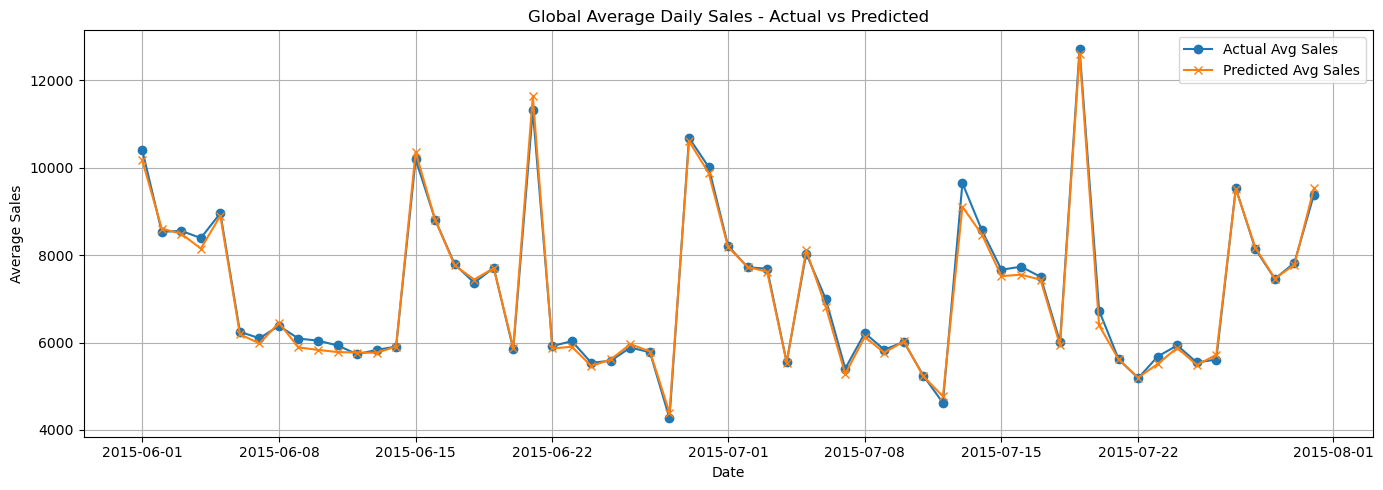

In [113]:
# Plot Actual vs Predicted
plt.figure(figsize=(14, 5))
plt.plot(test_agg_df['Date'], test_agg_df[target], label='Actual Avg Sales', marker='o')
plt.plot(test_agg_df['Date'], test_agg_df['Predicted'], label='Predicted Avg Sales', marker='x')
plt.title('Global Average Daily Sales - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<B>Insights<B>

Based on the plot "Global Average Daily Sales - Actual vs Predicted", the model has a good overall fit. The predicted values (orange) largely followed the trend of the actual sales (blue) showing that the model has learned the overall trends and daily fluctuations in the aggregated sales data despite the actual sales having significant day-to-day volatility. As such, the model for Objective 2 appears to be effective in providing reliable forecasts for global average daily sales. This is highly beneficial for strategic planning, resource allocation and optimizing supply chain management as well as budgeting on a company-wide basis.

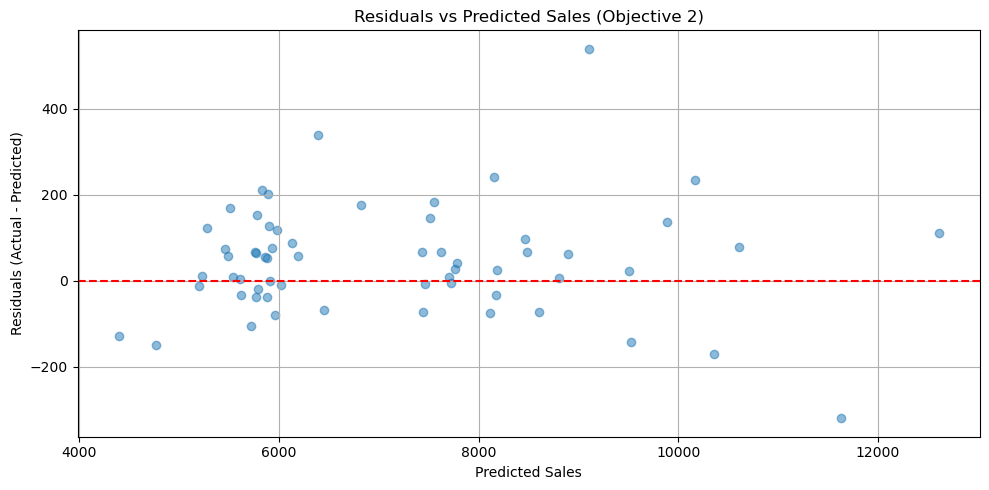

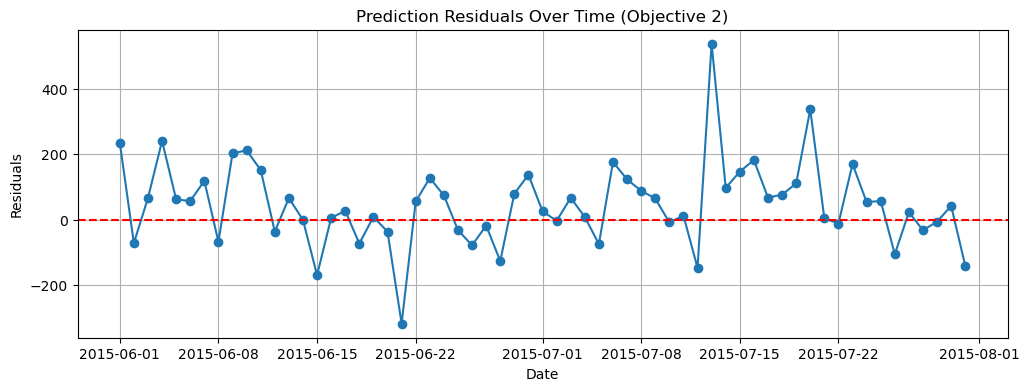

In [114]:
# Plot residual plot
test_agg_df['Residuals'] = test_agg_df[target] - test_agg_df['Predicted']

plt.figure(figsize=(10, 5))
plt.scatter(test_agg_df['Predicted'], test_agg_df['Residuals'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Sales (Objective 2)")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(test_agg_df['Date'], test_agg_df['Residuals'], marker='o', linestyle='-')
plt.axhline(0, linestyle='--', color='red')
plt.title("Prediction Residuals Over Time (Objective 2)")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

<B>Insights<B>

For the "Residuals vs Predicted Sales" of objective 2, unlike Objective 1's residual plot, these residuals are more centered around the red dashed line at y=0. This means that the model for Objective 2 does not have a consistent, strong bias (like the over-forecasting seen in Objective 1). The points appear to be randomly scattered with no clear pattern, trend, or discernible shape as predicted sales increase. This could mean that the model's errors are relatively consistent across different levels of predicted global average sales. So, this indicates a good fit without systematic issues related to the magnitude of sales. Most of the residuals fall within ~200. But there is one outlier around -300 at around 11,500 predicted sales.

For the "Prediction residuals over time" plot of objective 2, the residuals fluctuate above and below the red dashed line at y=0. This confirms the lack of systematic bias over time. There is a particularly large positive residual prior to 15th July 2015, indicating a significant under-prediction on that day. This aligns with the visual on the "Actual vs Predicted Sales" plot where the actual sales spiked higher than predicted. However, although still volatile, there is no obvious increasing or decreasing trend in the magnitude of the residuals over the observed period, suggesting the model's error characteristics are somewhat stable over time.

Compared to Objective 1, these residual plots for Objective 2 demonstrate a much healthier model. The residuals are centered around zero meaning that there is low bias. The random scatter also suggests that the linear assumptions of the model are appropriate. However, while unbiased, the errors are quite volatile, with significant positive and negative deviations on certain days. This could be suggesting that eventhough the model generally captures the trend, it might still miss some specific daily events or extreme fluctuations perfectly.

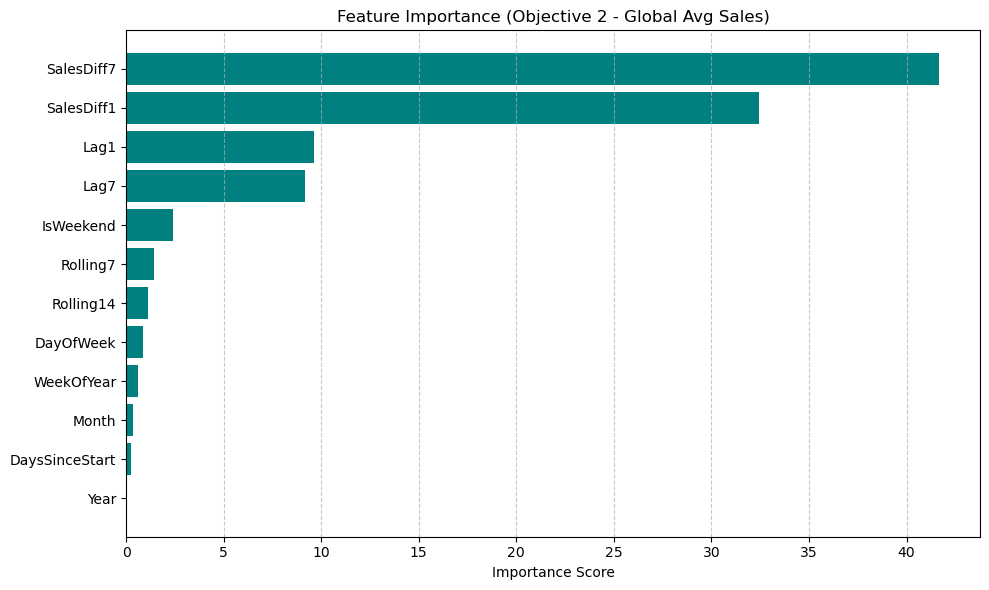

In [115]:
# Plot feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.get_feature_importance(train_pool)
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.title("Feature Importance (Objective 2 - Global Avg Sales)")
plt.xlabel("Importance Score")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<B>Insights<B>

The Feature Importance plot of objective 2 shows that SalesDiff7 and SalesDiff1 are the most critical features for predicting global average daily sales. This really highlights the profound influence of recent sales changes (daily and weekly) on aggregated sales figures across the entire network of Rossmann stores. Converesely, features like Rolling7, Rolling14, DayOfWeek, WeekOfYear, Month, DaysSinceStart, and Year all have very low importance scores. This suggests that once the sales differences and immediate lagged values are accounted for, the broader temporal indicators add very little additional predictive power to the model for global average sales. 

## 5.3 Model 3: XGBoost

### 5.3.1 XGBoost Objective 1: Forecast for Best-Performing Store (Store 262)

In [116]:
# ------------------------------
# Step 1: Load the data
# ------------------------------
import xgboost as xgb
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('feature_engineering.csv', parse_dates=["Date"], dayfirst=True)

# Sort by store and date
df.sort_values(["Store", "Date"], inplace=True)

df.head()

,Store,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,WeekOfYear,IsWeekend
0,1,2013-01-07,1,7176.0,785.0,1.0,1,0,1,9.141401,...,9.0,2008.0,0,0.0,0.0,0,1,2013,2,0
1,1,2013-01-10,4,4892.0,615.0,1.0,1,0,1,7.954472,...,9.0,2008.0,0,0.0,0.0,0,1,2013,2,0
2,1,2013-01-12,6,4952.0,646.0,1.0,0,0,0,7.665635,...,9.0,2008.0,0,0.0,0.0,0,1,2013,2,1
3,1,2013-01-15,2,3900.0,512.0,1.0,0,0,0,7.617188,...,9.0,2008.0,0,0.0,0.0,0,1,2013,3,0
4,1,2013-01-28,1,4055.0,549.0,1.0,0,0,0,7.386157,...,9.0,2008.0,0,0.0,0.0,0,1,2013,5,0


In [117]:
# ------------------------------
# Step 2: Create lag and rolling features
# ------------------------------
LAG_DAYS = [1, 7, 14, 28]
ROLLING_WINDOWS = [7, 14, 28]

for lag in LAG_DAYS:
    df[f"Sales_lag_{lag}"] = df.groupby("Store")["Sales"].shift(lag)

for window in ROLLING_WINDOWS:
    df[f"Sales_roll_mean_{window}"] = (
        df.groupby("Store")["Sales"].shift(1).rolling(window).mean()
    )

In [118]:
# ------------------------------
# Step 3: Additional time-based features
# ------------------------------

df["Date"] = pd.to_datetime(df["Date"])

df["Day"] = df["Date"].dt.day
df["IsMonthStart"] = df["Date"].dt.is_month_start.astype(int)
df["IsMonthEnd"] = df["Date"].dt.is_month_end.astype(int)

# Days since competition open
df["CompetitionOpen"] = pd.to_datetime(
    dict(year=df["CompetitionOpenSinceYear"].fillna(0).astype(int),
         month=df["CompetitionOpenSinceMonth"].fillna(1).astype(int),
         day=1),
    errors='coerce'
)
df["DaysSinceCompetitionOpen"] = (df["Date"] - df["CompetitionOpen"]).dt.days
df["DaysSinceCompetitionOpen"] = df["DaysSinceCompetitionOpen"].fillna(0)

df.head()

,Store,Date,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,Sales_lag_14,Sales_lag_28,Sales_roll_mean_7,Sales_roll_mean_14,Sales_roll_mean_28,Day,IsMonthStart,IsMonthEnd,CompetitionOpen,DaysSinceCompetitionOpen
0,1,2013-01-07,1,7176.0,785.0,1.0,1,0,1,9.141401,...,NaN,NaN,NaN,NaN,NaN,7,0,0,2008-09-01,1589.0
1,1,2013-01-10,4,4892.0,615.0,1.0,1,0,1,7.954472,...,NaN,NaN,NaN,NaN,NaN,10,0,0,2008-09-01,1592.0
2,1,2013-01-12,6,4952.0,646.0,1.0,0,0,0,7.665635,...,NaN,NaN,NaN,NaN,NaN,12,0,0,2008-09-01,1594.0
3,1,2013-01-15,2,3900.0,512.0,1.0,0,0,0,7.617188,...,NaN,NaN,NaN,NaN,NaN,15,0,0,2008-09-01,1597.0
4,1,2013-01-28,1,4055.0,549.0,1.0,0,0,0,7.386157,...,NaN,NaN,NaN,NaN,NaN,28,0,0,2008-09-01,1610.0


In [119]:
# ------------------------------
# Step 4: Encode categorical features
# ------------------------------
cat_features = ["StoreType", "Assortment", "StateHoliday"]
df[cat_features] = df[cat_features].astype(str)
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [120]:
# ------------------------------
# Step 5: Remove rows with missing lag features
# ------------------------------
df.dropna(subset=[f"Sales_lag_{lag}" for lag in LAG_DAYS], inplace=True)

In [121]:
# ------------------------------
# Step 6: Train-test split
# ------------------------------
# Use dates to split
# Train: from 2013-01-01 to 2015-05-31
train_df = df[(df["Date"] >= "2013-01-01") & (df["Date"] <= "2015-05-31")]

# Test: from 2015-06-01 to 2015-07-31
test_df = df[(df["Date"] >= "2015-06-01") & (df["Date"] <= "2015-07-31")]

# Target
TARGET = "Sales"

# Features to use
drop_cols = ["Date", "Customers", "SalesPerCustomer", "CompetitionOpen", "Sales"]
features = [col for col in train_df.columns if col not in drop_cols]

X_train = train_df[features]
y_train = train_df[TARGET]
X_test = test_df[features]
y_test = test_df[TARGET]

In [122]:
# ------------------------------
# Step 7: Train XGBoost model
# ------------------------------

# Fix object columns (drop or encode)
X_train = X_train.drop(columns=["PromoInterval"])
X_test = X_test.drop(columns=["PromoInterval"])

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "tree_method": "hist",
    "learning_rate": 0.1,
    "max_depth": 6
}

model = xgb.train(params, dtrain, num_boost_round=300,
                  evals=[(dtrain, "train"), (dtest, "test")],
                  early_stopping_rounds=20, verbose_eval=10)

[0]	train-rmse:2914.46606	test-rmse:2861.44799
[10]	train-rmse:1649.33137	test-rmse:1579.36685
[20]	train-rmse:1328.70294	test-rmse:1284.85828
[30]	train-rmse:1216.53868	test-rmse:1225.70373
[40]	train-rmse:1154.18117	test-rmse:1197.64211
[50]	train-rmse:1109.00193	test-rmse:1182.67461
[60]	train-rmse:1079.17479	test-rmse:1172.15160
[70]	train-rmse:1053.73979	test-rmse:1164.00100
[80]	train-rmse:1034.08655	test-rmse:1155.23133
[90]	train-rmse:1013.60675	test-rmse:1152.77080
[100]	train-rmse:994.20743	test-rmse:1145.28675
[110]	train-rmse:977.66551	test-rmse:1142.83468
[120]	train-rmse:965.53904	test-rmse:1139.72004
[130]	train-rmse:953.98490	test-rmse:1138.21864
[140]	train-rmse:943.85347	test-rmse:1136.96021
[150]	train-rmse:931.74670	test-rmse:1134.79344
[160]	train-rmse:922.06448	test-rmse:1134.16778
[170]	train-rmse:913.83682	test-rmse:1134.31230
[180]	train-rmse:905.52908	test-rmse:1132.37853
[190]	train-rmse:895.89814	test-rmse:1131.01383
[200]	train-rmse:888.27756	test-rmse:1130

RMSE: 1127.34
MAE: 810.63


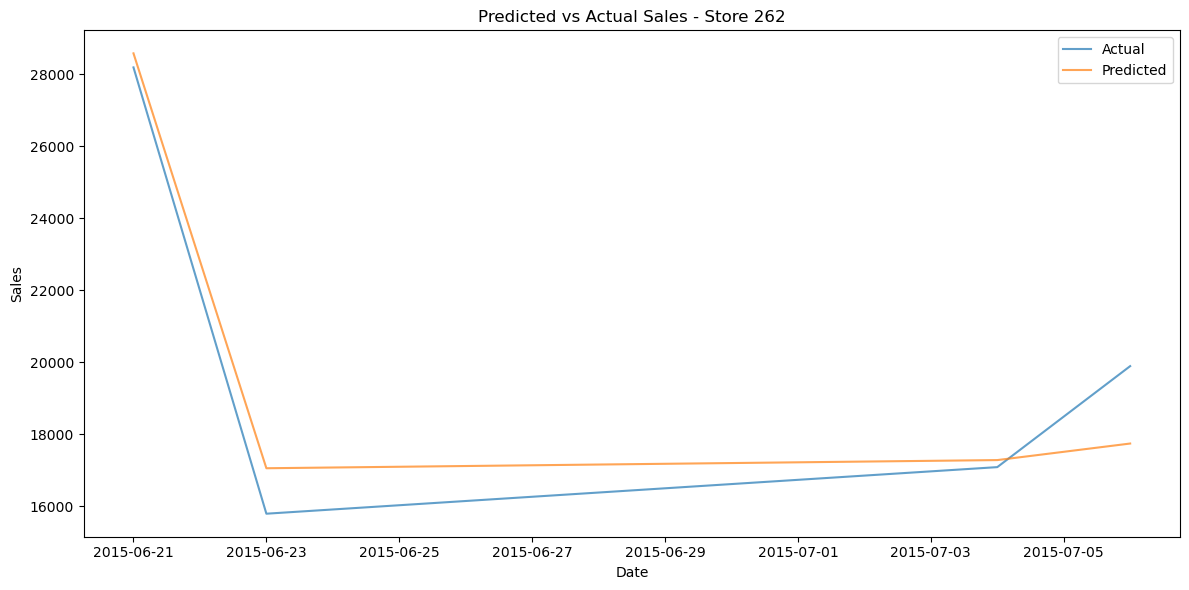

In [123]:
# ------------------------------
# Step 8: Evaluation
# ------------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(dtest)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# ------------------------------
# Step 9: Plot predicted vs actual
# ------------------------------
# Group by Store ID
store_ids = test_df["Store"].unique()
store = 262  # specify the store ID

# Create mask for Store 262
store_mask = test_df["Store"] == store

plt.figure(figsize=(12, 6))
plt.plot(test_df.loc[store_mask, "Date"], y_test[store_mask], label="Actual", alpha=0.7)
plt.plot(test_df.loc[store_mask, "Date"], y_pred[store_mask], label="Predicted", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title(f"Predicted vs Actual Sales - Store {store}")
plt.legend()
plt.tight_layout()
plt.show()

In [124]:
# Create comparison table
results_df = pd.DataFrame({
    "Date": test_df.loc[store_mask, "Date"].values,
    "Store": store,
    "Actual_Sales": y_test[store_mask].values,
    "Predicted_Sales": y_pred[store_mask]
})

# Optional: Round the sales for cleaner view
results_df["Predicted_Sales"] = results_df["Predicted_Sales"].round(2)

# Reset index for neatness
results_df.reset_index(drop=True, inplace=True)

# Display the table
print(results_df)

        Date  Store  Actual_Sales  Predicted_Sales
0 2015-06-21    262       28187.0     28577.089844
1 2015-06-23    262       15797.0     17059.000000
2 2015-07-04    262       17090.0     17285.580078
3 2015-07-06    262       19894.0     17745.050781


In [125]:
# Extract actual and predicted values for Store 262
y_true_262 = y_test[store_mask]
y_pred_262 = y_pred[store_mask]

# Evaluation metrics
mae_262 = mean_absolute_error(y_true_262, y_pred_262)
rmse_262 = np.sqrt(mean_squared_error(y_true_262, y_pred_262))
rmspe_262 = np.sqrt(np.mean(np.square((y_true_262 - y_pred_262) / y_true_262)))

# Print nicely
print(f"📊 Evaluation Metrics for Store {store}:")
print(f"MAE:   {mae_262:.2f}")
print(f"RMSE:  {rmse_262:.2f}")
print(f"RMSPE: {rmspe_262:.4f}")

📊 Evaluation Metrics for Store 262:
MAE:   999.15
RMSE:  1265.01
RMSPE: 0.0678


### 5.3.2 XGBoost Objective 2: Global Average Sales Across All Stores

In [126]:
# Step 1: Create DataFrame with actual and predicted values
plot_df = test_df[["Date"]].copy()
plot_df["Actual"] = y_test.values
plot_df["Predicted"] = y_pred

# Step 2: Group by date and calculate average sales across all stores
daily_avg = plot_df.groupby("Date").mean().reset_index()

# Step 3: Calculate evaluation metrics on daily average sales
y_true_avg = daily_avg["Actual"].values
y_pred_avg = daily_avg["Predicted"].values

# Compute metrics
mae_avg = mean_absolute_error(y_true_avg, y_pred_avg)
rmse_avg = np.sqrt(mean_squared_error(y_true_avg, y_pred_avg))
rmspe_avg = np.sqrt(np.mean(np.square((y_true_avg - y_pred_avg) / (y_true_avg + 1e-9))))  # avoid divide by zero

# Step 4: Display results
print("📊 Evaluation Metrics for Global Daily Average Forecast:")
print(f"MAE:   {mae_avg:.2f}")
print(f"RMSE:  {rmse_avg:.2f}")
print(f"RMSPE: {rmspe_avg:.4f}")

📊 Evaluation Metrics for Global Daily Average Forecast:
MAE:   412.07
RMSE:  571.13
RMSPE: 0.0803


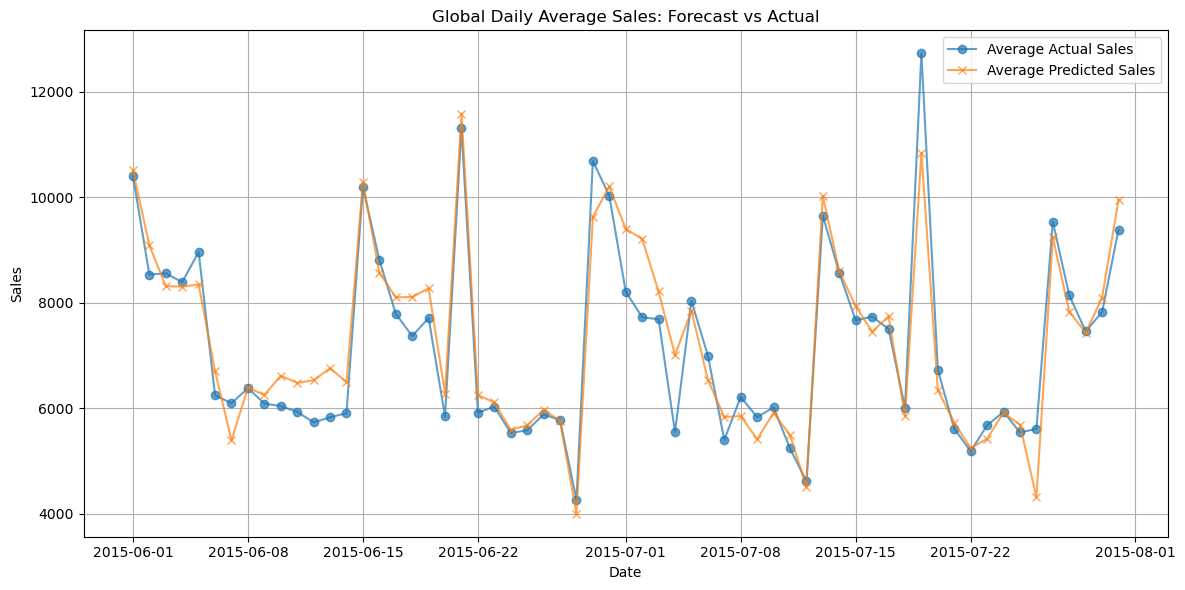

In [127]:
# Assuming daily_avg DataFrame already exists from previous step:
# It contains columns: Date, Actual, Predicted

plt.figure(figsize=(12, 6))
plt.plot(daily_avg["Date"], daily_avg["Actual"], label="Average Actual Sales", alpha=0.7, marker='o')
plt.plot(daily_avg["Date"], daily_avg["Predicted"], label="Average Predicted Sales", alpha=0.7, marker='x')
plt.title("Global Daily Average Sales: Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()